### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

**Context** : A team of data analysts was contracted by the National Health Services (NHS), a publicly funded healthcare system in England to analyze the data they collect to adopt a more data-informed approach in deciding how best to handle their problems. 

<b>Aim</b>: To address problems such as missed appointments,appropriate staffing levels faced by the National Health Service (NHS) by analysing the given the datasets for meaningful insights.
Steps involved :
<ul><li>Data exploration</li>
<li>Data wrangling</li>
<li>Visualisations</li>  
<li>Identifying possible trends in the data sets</li>
</ul>
![image nhs stock pic](../images/nhs_image1.png)

<img src ="../images/nhs_image1.png" align = left>

# 

### Link to GitHub repository

In [1]:
# My GitHub repository.

[github link](https://github.com/Smita-Pr/Smita_Prasad_LSE_DA201_Assignment_Files.git)

# 

# Data Exploration

The dataset includes the following datasets-:
1.	actual_duration.csv – Details of appointments made by patients. For example, the regional information, date, duration, and count of appointments.
2.	appointments_regional.csv – Details on the type of appointments made by patients. For example, regional information, the month of appointment, appointment status, healthcare professional, appointment mode, the time between booking and the appointment, the count of appointments.
3.	national_categories.xlsx – Details of the national categories of appointments made by patients. For example, the regional information, date of appointment, service setting, type of context, national category, and the number of appointments pertaining to a certain class.
4.	metadata_nhs.txt – Details of the data set, data quality, and reference.
5.	tweets.csv – Data related to healthcare in the UK scraped from Twitter.


### Prepare workstation

In [2]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv("../Data/actual_duration.csv")

# View the DataFrame.
ad

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439


In [4]:
# Determine whether there are missing values.
ad.isnull().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [5]:
# Determine the metadata of the data set.
print("The metadata of the actual_duration ad dataframe:")
print(ad.info())

The metadata of the actual_duration ad dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
None


In [6]:
# Determine the descriptive statistics of the data set.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [7]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv("../Data/appointments_regional.csv")

# View the DataFrame.
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [8]:
# Determine whether there are missing values.
ar.isnull().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

In [9]:
# Determine the metadata of the data set.
print("The metadata of the appointments_regional ar dataframe:")

print(ar.info())

The metadata of the appointments_regional ar dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB
None


In [10]:
# Determine the descriptive statistics of the data set.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [11]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel("../Data/national_categories.xlsx")


In [12]:
# View the DataFrame.
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [13]:
# Determine whether there are missing values.
nc.isnull().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

In [14]:
# Determine the metadata of the data set.
print("The metadata of the national_categories nc dataframe:")
print(nc.info())

The metadata of the national_categories nc dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB
None


In [15]:
# Determine the descriptive statistics of the data set.
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


### Understanding the data set

**Question 1:** How many locations are there in the data set?

In [16]:
# Determine the number of locations.
print(("There are a total of {} locations in the dataset.\n"+
        "Their names are as follows "+
        "-:\n {}:").format(len(nc.sub_icb_location_name.unique()),nc.sub_icb_location_name.unique()))

There are a total of 106 locations in the dataset.
Their names are as follows -:
 ['NHS North East and North Cumbria ICB - 00L'
 'NHS North East and North Cumbria ICB - 00N'
 'NHS North East and North Cumbria ICB - 00P'
 'NHS Lancashire and South Cumbria ICB - 00Q'
 'NHS Lancashire and South Cumbria ICB - 00R'
 'NHS Greater Manchester ICB - 00T' 'NHS Greater Manchester ICB - 00V'
 'NHS Lancashire and South Cumbria ICB - 00X'
 'NHS Greater Manchester ICB - 00Y'
 'NHS Lancashire and South Cumbria ICB - 01A'
 'NHS Greater Manchester ICB - 01D'
 'NHS Lancashire and South Cumbria ICB - 01E'
 'NHS Cheshire and Merseyside ICB - 01F'
 'NHS Greater Manchester ICB - 01G'
 'NHS North East and North Cumbria ICB - 01H'
 'NHS Cheshire and Merseyside ICB - 01J'
 'NHS Lancashire and South Cumbria ICB - 01K'
 'NHS Cheshire and Merseyside ICB - 01T'
 'NHS Cheshire and Merseyside ICB - 01V'
 'NHS Greater Manchester ICB - 01W'
 'NHS Cheshire and Merseyside ICB - 01X'
 'NHS Greater Manchester ICB - 01Y' 'N

**Question 2:** What are the five locations with the highest number of records?



In [17]:
# Determine the top five locations based on record count.
print("The top 5 locations in terms of number of records are:\n",nc.sub_icb_location_name.value_counts().head(5))


The top 5 locations in terms of number of records are:
 NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [18]:
# The different service settings.
print("The number of service settings with their record counts are :\n",nc.service_setting.value_counts())

The number of service settings with their record counts are :
 General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: service_setting, dtype: int64


In [19]:
# Determine the number of context types.
print("The number of context types with their record counts are :\n",nc.context_type.value_counts())

The number of context types with their record counts are :
 Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419
Name: context_type, dtype: int64


In [20]:
# Determine the number of national categories.
print("The different of national categories with their record counts are :\n",nc.national_category.value_counts())

The different of national categories with their record counts are :
 Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation external to the practice              43095
Home Visit                                                             41850
Unplanned Clinical Activity                                            40415
Patient contact during Care Home Round                                 28795
Unmapped                                                               27419
Care Ho

In [21]:
# Determine the number of appointment status.
print("The different appointment status values with their record counts :\n",ar.appointment_status.value_counts())

The different appointment status values with their record counts :
 Attended    232137
Unknown     201324
DNA         163360
Name: appointment_status, dtype: int64


# 

# Exploring the data for more specific questions

Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [22]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad.appointment_date.head(5)

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [23]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc.appointment_date.head(5)

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [24]:
# Change the date format of ad['appointment_date'].
ad['appointment_date']=pd.to_datetime(ad['appointment_date'])
# View the DateFrame.
ad.dtypes

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object

In [25]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
"""The minimum and maximum dates in ad"""
print("The minimum date in actual duration ad DataFrame is :",ad.appointment_date.min())
print("The maximum date in actual duration ad DataFrame is :",ad.appointment_date.max())

The minimum date in actual duration ad DataFrame is : 2021-12-01 00:00:00
The maximum date in actual duration ad DataFrame is : 2022-06-30 00:00:00


In [26]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
"""The minimum and maximum dates in nc """
print("The minimum date in national categories nc DataFrame is :",nc.appointment_date.min())
print("The maximum date in nc DataFrame is :",nc.appointment_date.max())

The minimum date in national categories nc DataFrame is : 2021-08-01 00:00:00
The maximum date in nc DataFrame is : 2022-06-30 00:00:00


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [27]:
# For each of these service settings, determine the number of records available for the period and the location. 

# The subset of nc of the NHS North West London location between the period 1 January to 1 June 2022
start_dt = pd.to_datetime('2022-01-01')
end_dt = pd.to_datetime('2022-06-01')
nc_subset = nc[(nc.appointment_date > start_dt) & (nc.appointment_date < end_dt) 
               & nc.sub_icb_location_name.str.match('NHS North West London ICB - W2U3Z')  ]

# View the output.
print("The count of records in NHS North West London location of each service setting:\n",
      nc_subset.service_setting.value_counts())
print("\nThe most popopular service setting in NHS North West London location is :",
      nc_subset.service_setting.value_counts().head(1))

The count of records in NHS North West London location of each service setting:
 General Practice             2080
Other                        1307
Primary Care Network         1261
Extended Access Provision    1076
Unmapped                      150
Name: service_setting, dtype: int64

The most popopular service setting in NHS North West London location is : General Practice    2080
Name: service_setting, dtype: int64


**Question 3:** Which month had the highest number of appointments?

In [28]:
#nc.head(20)

In [29]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
nc_monthly = nc['count_of_appointments'].groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month]).sum()

print("\tThe total number of appointments monthly (sorted):\n",nc_monthly.sort_values(ascending=False))

high_appmnt_month = nc_monthly.sort_values(ascending=False).head(1).index.tolist()
print("\n\nThe highest number of appointments was in the month,Year: "
      +str(high_appmnt_month[0][1])+","  
      +str(high_appmnt_month[0][0]))

	The total number of appointments monthly (sorted):
 appointment_date  appointment_date
2021              11                  30405070
                  10                  30303834
2022              3                   29595038
2021              9                   28522501
2022              5                   27495508
                  6                   25828078
                  1                   25635474
                  2                   25355260
2021              12                  25140776
2022              4                   23913060
2021              8                   23852171
Name: count_of_appointments, dtype: int64


The highest number of appointments was in the month,Year: 11,2021


### summary of the findings above
The data collected for the actual duration dataset is between December,2021 to June,2022.The data collected for the national categories dataset is between August,2021 and June,2022.
Choosing the 'NHS North West London ICB - W2U3Z' location to study the appointments between the periods 1 January to 1 June 2022, we find that the General Practice ws the most popular service setting.
and overall November,2021 saw the highest number of appointments.

The number of records per month in national categories for all locations per month is given below:

**Question 4:** What was the total number of records per month?

In [30]:
# Total number of records per month.
print("\tThe number of records monthly :\n",
nc['count_of_appointments'].groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month]).count())

	The number of records monthly :
 appointment_date  appointment_date
2021              8                   69999
                  9                   74922
                  10                  74078
                  11                  77652
                  12                  72651
2022              1                   71896
                  2                   71769
                  3                   82822
                  4                   70012
                  5                   77425
                  6                   74168
Name: count_of_appointments, dtype: int64


# 

# Visualisations

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [31]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

#Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})


In [32]:

# # Colour palette to make charts look better.
blue, = sns.color_palette("muted", 1) 

# Dark grid, white grid, dark, white, and ticks.
sns.set_style('whitegrid') 

# Font size of the axes titles.
plt.rc('axes', titlesize=18) 

# Font size of the x and y labels.
plt.rc('axes', labelsize=14)    

# Font size of the tick labels.
plt.rc('xtick', labelsize=13,color='#4f4e4e') 

# Font size of the tick labels.
plt.rc('ytick', labelsize=13,color='#4f4e4e')  

# Font size of the Legend.
plt.rc('legend', fontsize=13)

# Default text size.
plt.rc('font', size=13)          

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [33]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc.appointment_month = nc.appointment_month.astype(str)
nc.appointment_month.info()

<class 'pandas.core.series.Series'>
RangeIndex: 817394 entries, 0 to 817393
Series name: appointment_month
Non-Null Count   Dtype 
--------------   ----- 
817394 non-null  object
dtypes: object(1)
memory usage: 6.2+ MB


In [34]:
# Aggregate on monthly level and determine the sum of records per month.
nc_ss = nc.groupby(['service_setting','appointment_month']).agg({'count_of_appointments':'sum'}).reset_index()
nc_ss = pd.DataFrame(nc_ss)

In [35]:
nc_ss


,service_setting,appointment_month,count_of_appointments
0,Extended Access Provision,2021-08,160927
1,Extended Access Provision,2021-09,187906
2,Extended Access Provision,2021-10,209539
3,Extended Access Provision,2021-11,207577
4,Extended Access Provision,2021-12,173504
5,Extended Access Provision,2022-01,186375
6,Extended Access Provision,2022-02,196627
7,Extended Access Provision,2022-03,231905
8,Extended Access Provision,2022-04,192284
9,Extended Access Provision,2022-05,220511


**Service settings:**

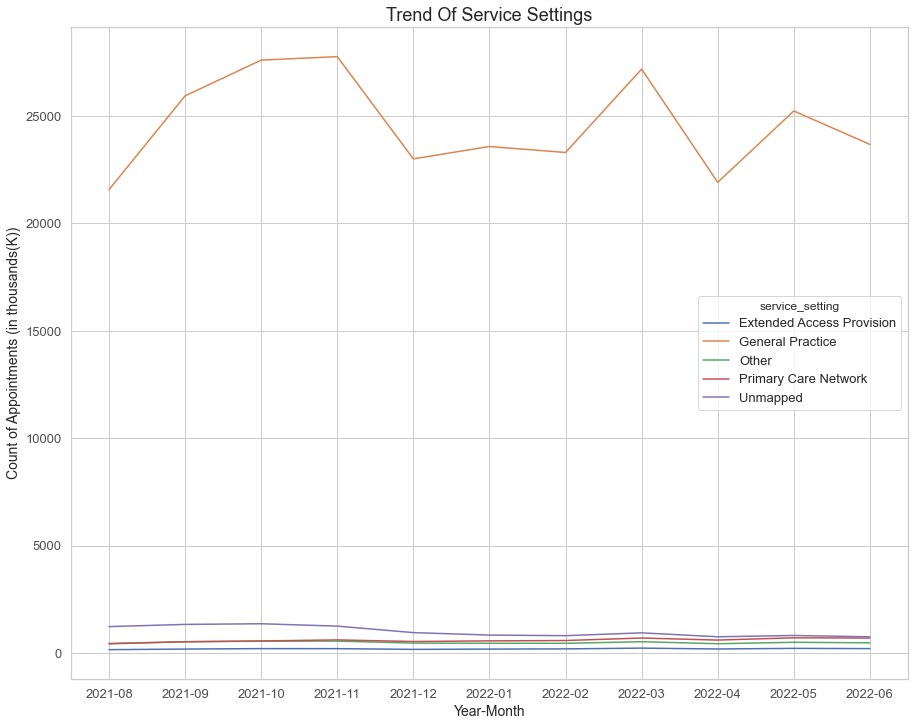

In [36]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
#fig,ax=plt.subplots()
#fig.set_size_inches(14, 8)
#sns.set_style('darkgrid')
ss_plot = sns.lineplot(data = nc_ss,x=nc_ss.appointment_month,y=(nc_ss['count_of_appointments']/1000),
                       hue=nc_ss.service_setting,ci=False)
plt.title("Trend Of Service Settings")
plt.xlabel("Year-Month")
plt.ylabel("Count of Appointments (in thousands(K))")
plt.savefig('../Output/trend_service_setting.png', dpi=80)

As we can see , 'General Practice' setting has a much higher count of appointments compared to other service settings.It therefore seems prudent to examine the General Practice setting seperately.We will visualise the distribution of the service setting using a boxenplot in seaborn.It is similar to a box plot in plotting a nonparametric representation of a distribution in which all features correspond to actual observations. By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails.
[boxenplot](https://seaborn.pydata.org/generated/seaborn.boxenplot.html)

Text(0.5, 1.0, 'The distribution of Service Settings')

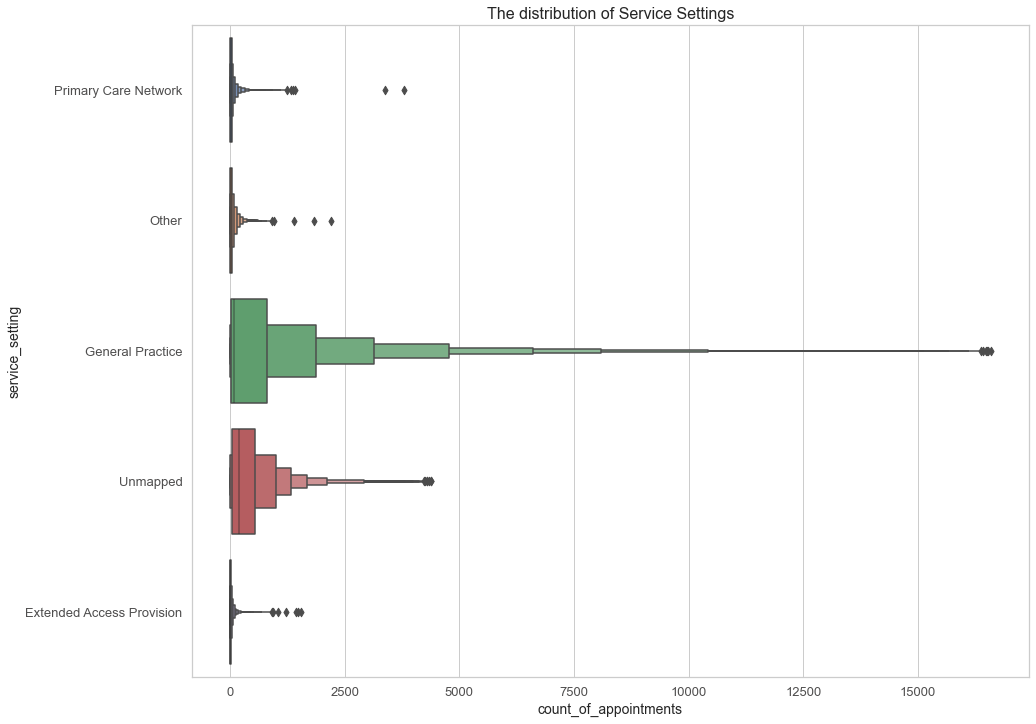

In [37]:
sns.boxenplot(y="service_setting", x="count_of_appointments", data=nc)
plt.title("The distribution of Service Settings",fontsize = 16)

In [38]:
# analyze the General Practice seperately and plot the rest of the service settings to discern any patterns
nc_ss_others = nc_ss[nc_ss.service_setting!='General Practice']
#nc_ss_others = nc_ss_others[nc_ss.service_setting!='Unmapped']


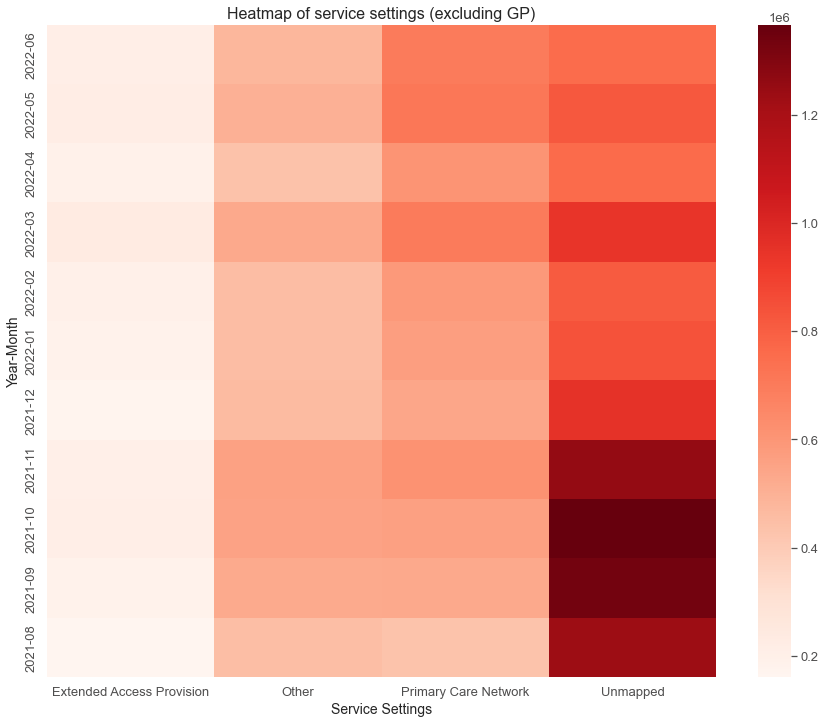

In [39]:
#sns.lineplot(data = nc_ss_others,x=nc_ss_others.appointment_month,y=(nc_ss_others['count_of_appointments']/1000),
#                       hue=nc_ss_others.service_setting,ci=False)


g = sns.heatmap(nc_ss_others.pivot(index='appointment_month',columns='service_setting',values='count_of_appointments'),
           cmap='Reds')
g.invert_yaxis()
plt.title("Heatmap of service settings (excluding GP)",fontsize=16)
plt.ylabel("Year-Month")
plt.xlabel("Service Settings")
plt.savefig('../Output/heatmap_other_service_setting.png', dpi=80)

Using the heatmap we can see that there are higher unmapped values in September and October of 2021 which decreases in 2022.

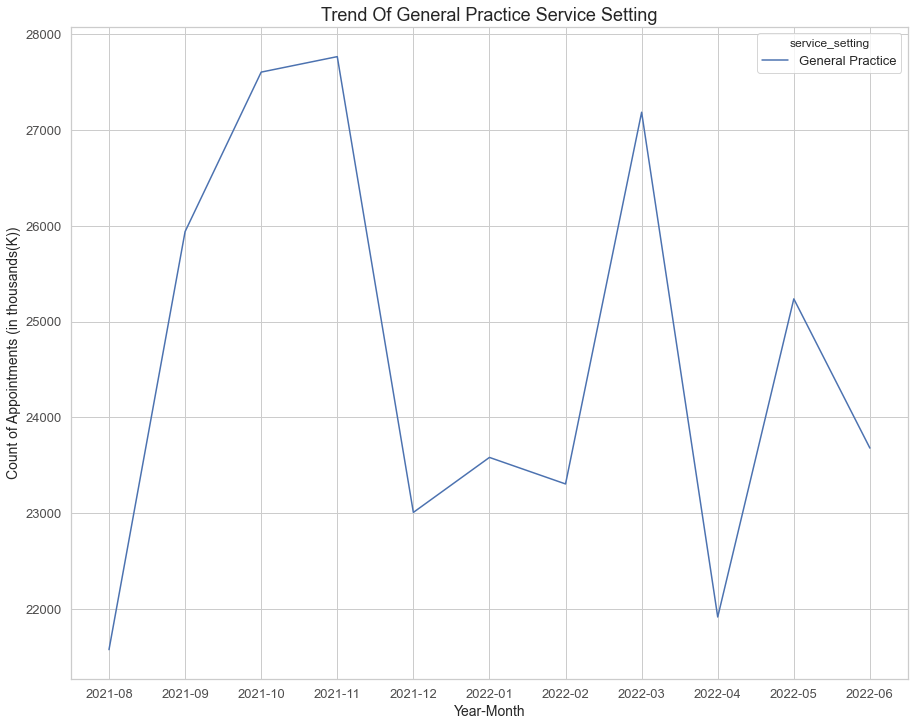

In [40]:
nc_ss_gp = nc_ss[nc_ss.service_setting =='General Practice']
sns.lineplot(data = nc_ss_gp,x=nc_ss_gp.appointment_month,y=(nc_ss_gp['count_of_appointments']/1000),
                       hue=nc_ss_gp.service_setting,ci=False)
plt.title("Trend Of General Practice Service Setting")
plt.xlabel("Year-Month")
plt.ylabel("Count of Appointments (in thousands(K))")
plt.savefig('../Output/trend_gp_service_setting.png', dpi=80)

**Context types:**

In [41]:
#Context types ordered 
nc_ct = nc.groupby(['context_type','appointment_month']).agg({'count_of_appointments':'sum'}).reset_index()
nc_ct = pd.DataFrame(nc_ct)

# View output.
nc_ct

,context_type,appointment_month,count_of_appointments
0,Care Related Encounter,2021-08,20255235
1,Care Related Encounter,2021-09,24404251
2,Care Related Encounter,2021-10,26125201
3,Care Related Encounter,2021-11,26282778
4,Care Related Encounter,2021-12,21798612
5,Care Related Encounter,2022-01,22441947
6,Care Related Encounter,2022-02,22211021
7,Care Related Encounter,2022-03,25928850
8,Care Related Encounter,2022-04,20904193
9,Care Related Encounter,2022-05,24101243


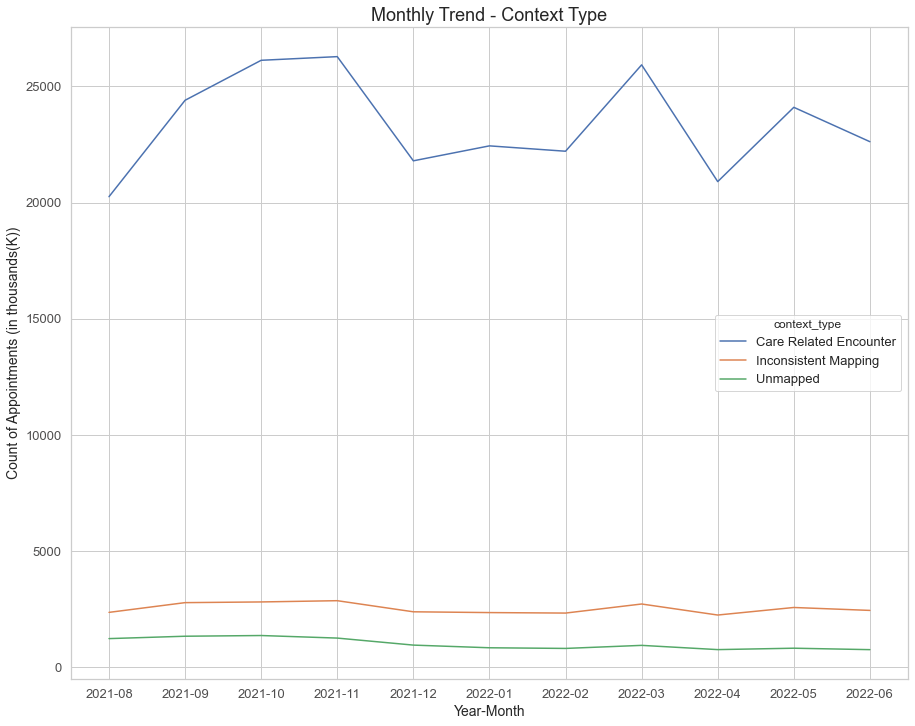

In [42]:
sns.lineplot(data = nc_ct,x=nc_ct.appointment_month,y=(nc_ct['count_of_appointments']/1000),
                       hue=nc_ct.context_type,ci=False)
plt.title("Monthly Trend - Context Type")
plt.xlabel("Year-Month")
plt.ylabel("Count of Appointments (in thousands(K))")
plt.savefig('../Output/trend_context_type.png', dpi=80)

**NHS Locations**

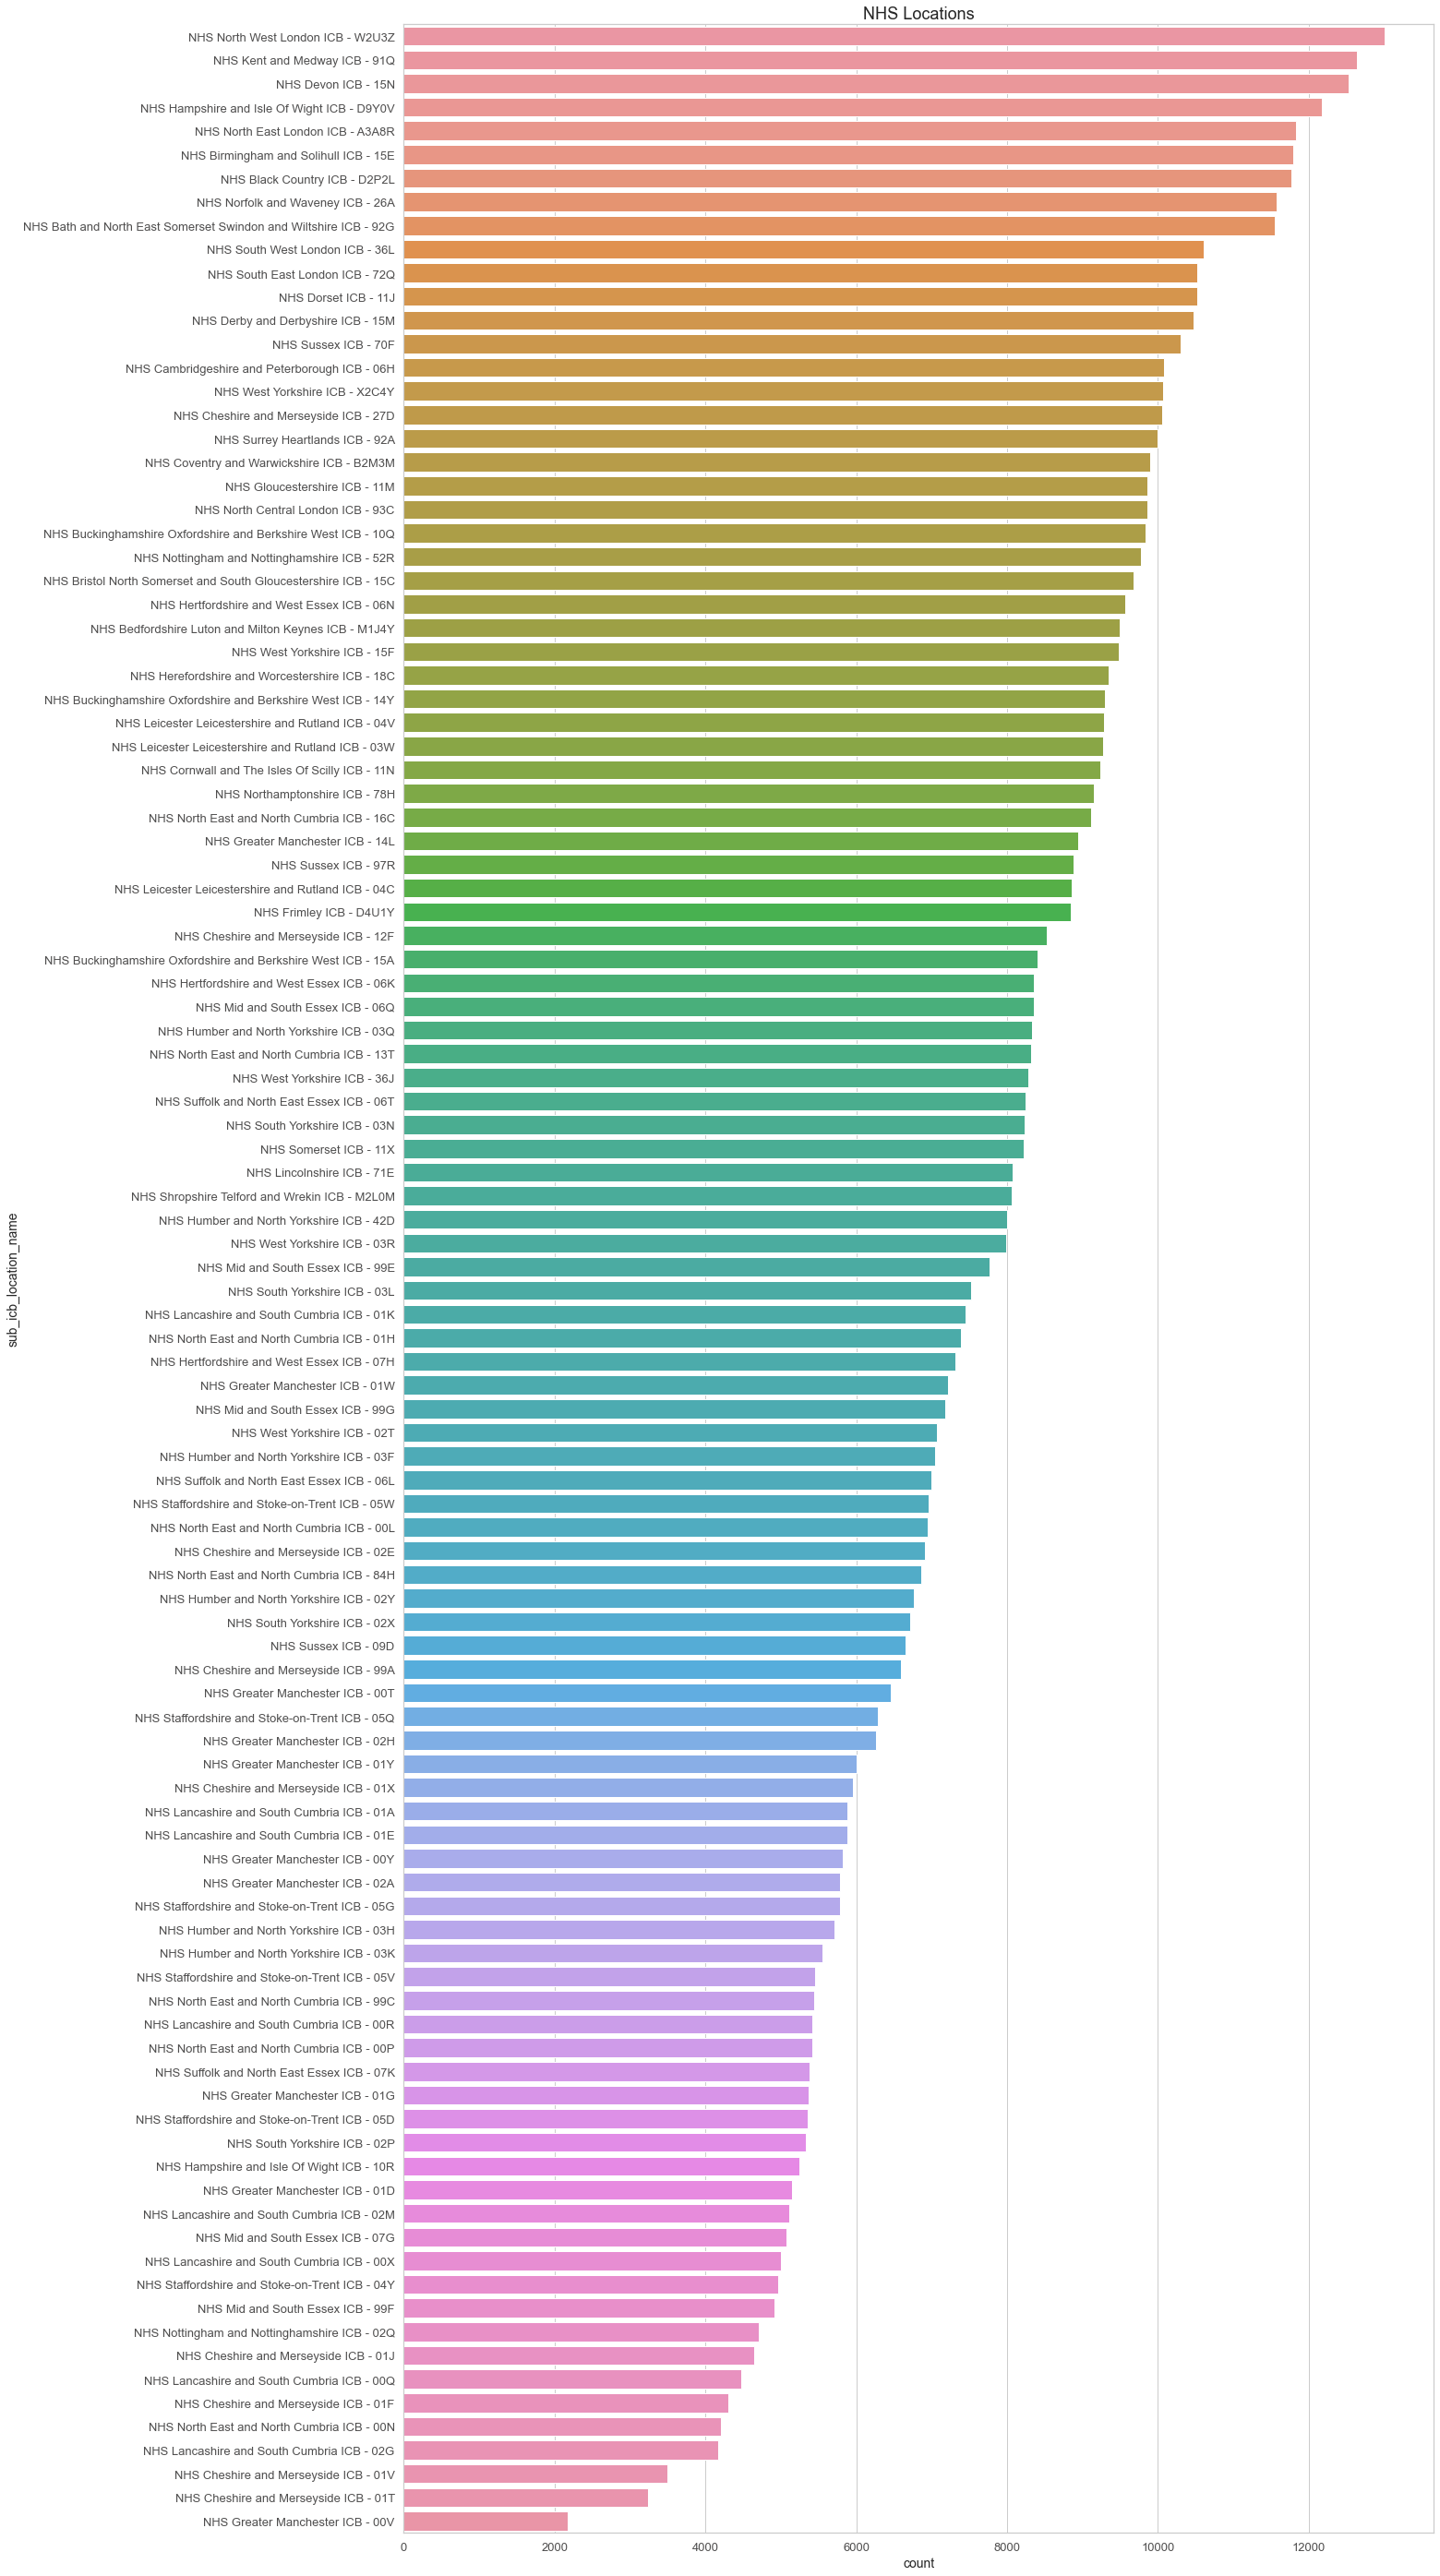

In [43]:
fig,ax=plt.subplots()
fig.set_size_inches(20, 50)
sns.countplot(data= nc,y=nc.sub_icb_location_name,order = nc['sub_icb_location_name'].value_counts().index)
plt.title("NHS Locations")
plt.savefig('../Output/nhs_locations.png', dpi=80)

Viewing top 20 locations 

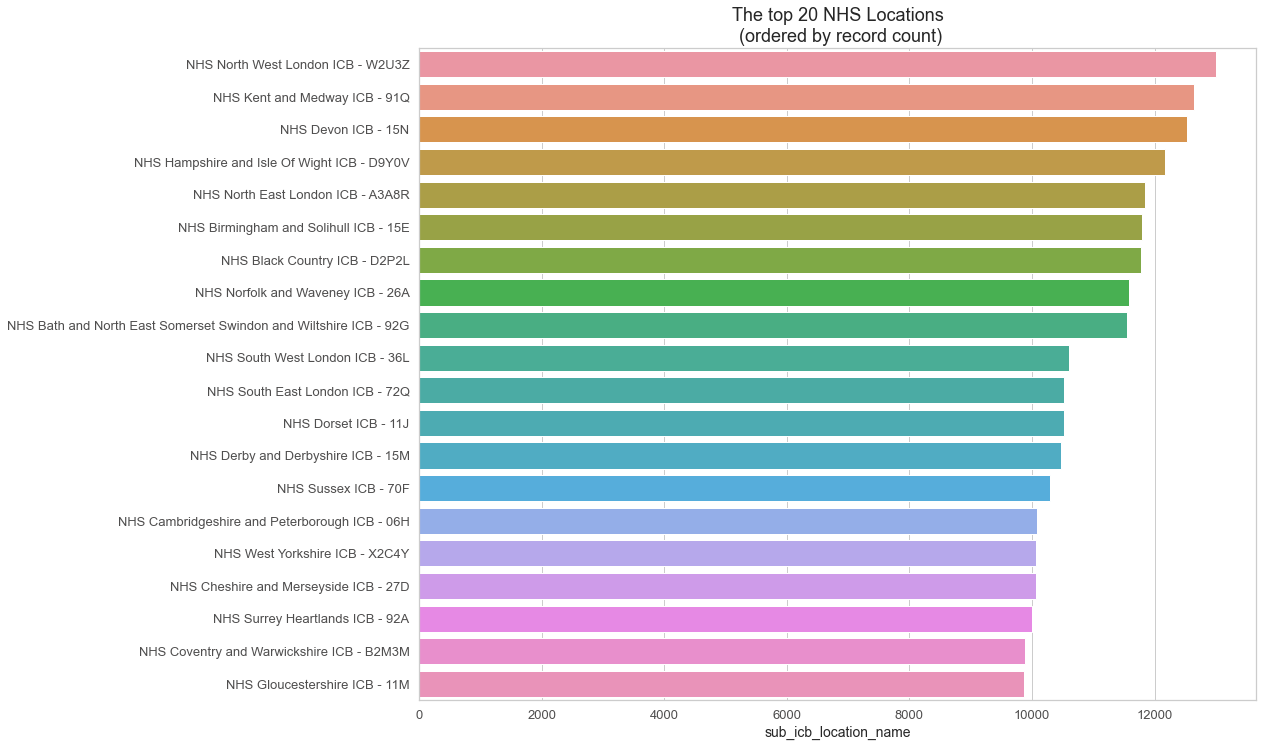

In [44]:
top_locatn = nc['sub_icb_location_name'].value_counts().head(20).to_frame() 
sns.barplot(data =top_locatn,x='sub_icb_location_name',y=top_locatn.index)
plt.title("The top 20 NHS Locations\n (ordered by record count)")
plt.savefig('../Output/nhs_20_locations.png', dpi=80)

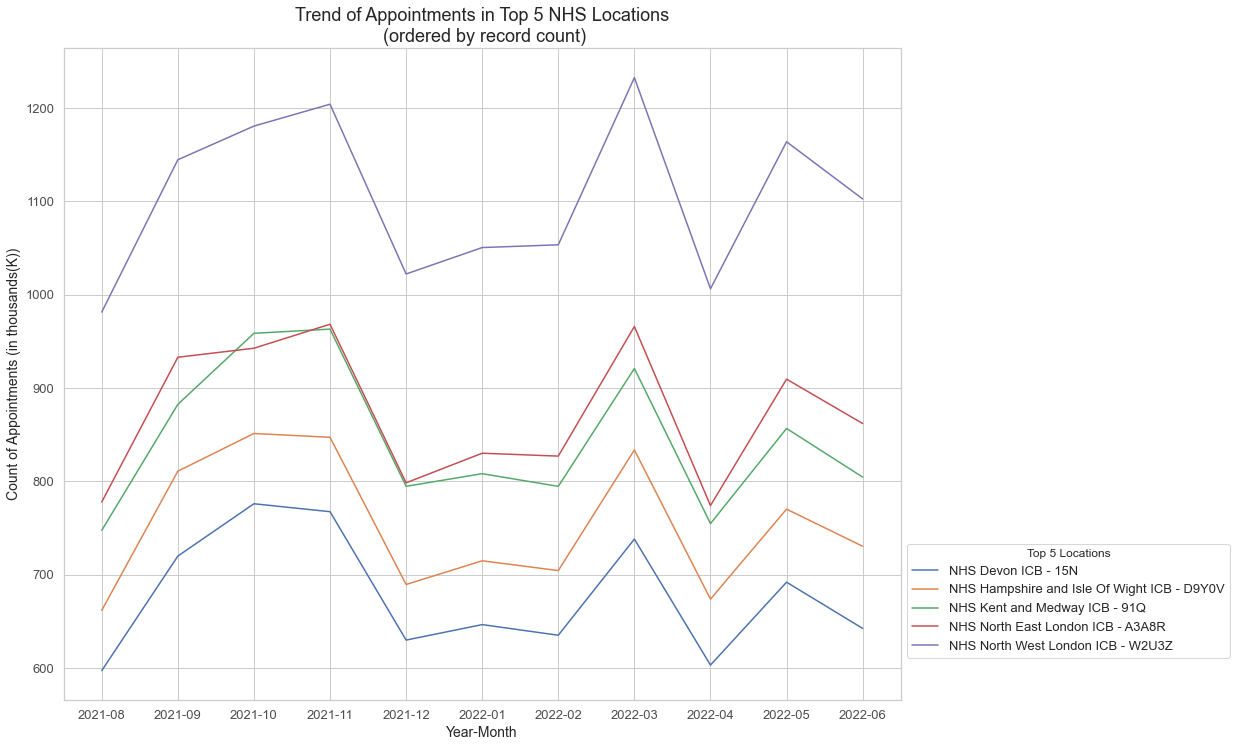

In [45]:
top_5_locatn = nc['sub_icb_location_name'].value_counts().head(5).to_frame() 
keep_list = top_5_locatn.index.tolist()
keep_list
nc_rgn = nc.groupby(['sub_icb_location_name','appointment_month']).agg({'count_of_appointments':'sum'}).reset_index()
nc_rgn = pd.DataFrame(nc_rgn)
nc_rgn = nc_rgn[nc_rgn['sub_icb_location_name'].isin(keep_list)]
sns.lineplot(data = nc_rgn,x=nc_rgn.appointment_month,y=(nc_rgn['count_of_appointments']/1000),
                       hue=nc_rgn.sub_icb_location_name,ci=False)
plt.legend(title = 'Top 5 Locations',bbox_to_anchor=(1,0.25))
plt.title("Trend of Appointments in Top 5 NHS Locations\n (ordered by record count)")
plt.xlabel("Year-Month")
plt.ylabel("Count of Appointments (in thousands(K))")
plt.savefig('../Output/trend_nhs_5_locations.png', dpi=80)

**National categories:**

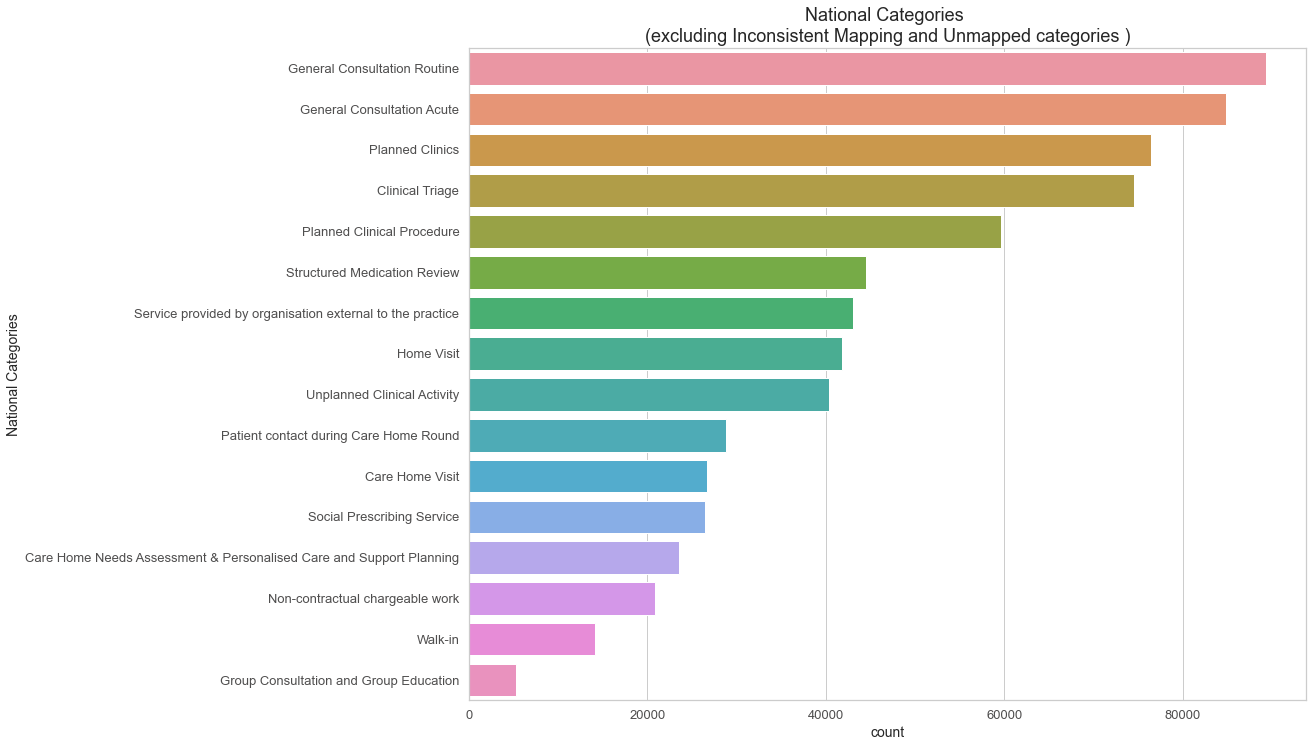

In [46]:
data = nc[~(nc.national_category.str.contains('Inconsistent Mapping')|nc.national_category.str.contains('Unmapped'))]
sns.countplot(data = data,y=data.national_category,order = data['national_category'].value_counts().index)
plt.title("National Categories \n(excluding Inconsistent Mapping and Unmapped categories )")
plt.ylabel("National Categories")
plt.savefig('../Output/national_categories.png', dpi=80)

In [47]:
nc_natcat = nc.groupby(['national_category','appointment_month']).agg({'count_of_appointments':'sum'}).reset_index()
nc_natcat= pd.DataFrame(nc_natcat)
nc_natcat.head(20)

,national_category,appointment_month,count_of_appointments
0,Care Home Needs Assessment & Personalised Care...,2021-08,29676
1,Care Home Needs Assessment & Personalised Care...,2021-09,33503
2,Care Home Needs Assessment & Personalised Care...,2021-10,32441
3,Care Home Needs Assessment & Personalised Care...,2021-11,38827
4,Care Home Needs Assessment & Personalised Care...,2021-12,34653
5,Care Home Needs Assessment & Personalised Care...,2022-01,37988
6,Care Home Needs Assessment & Personalised Care...,2022-02,37219
7,Care Home Needs Assessment & Personalised Care...,2022-03,43189
8,Care Home Needs Assessment & Personalised Care...,2022-04,35282
9,Care Home Needs Assessment & Personalised Care...,2022-05,42904


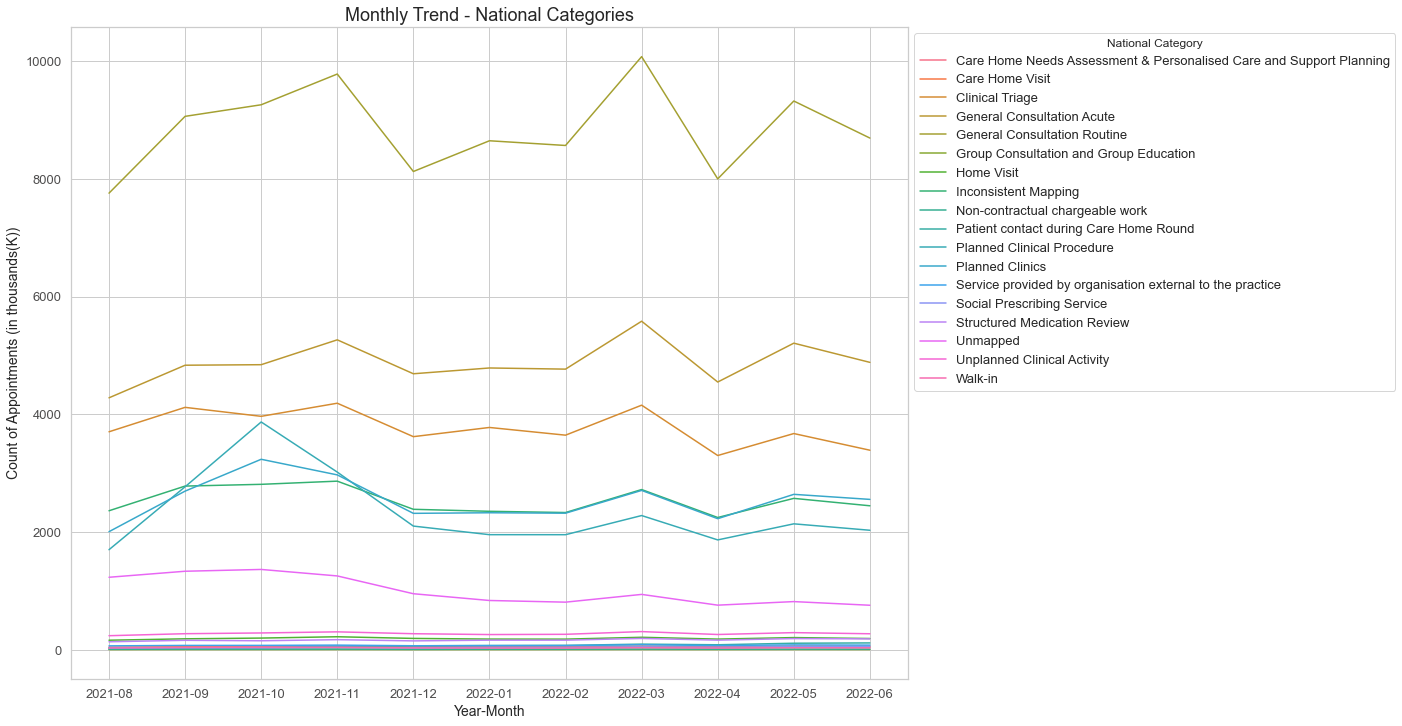

In [48]:
sns.lineplot(data = nc_natcat,x=nc_natcat.appointment_month,y=(nc_natcat['count_of_appointments']/1000),
                       hue=nc_natcat.national_category,ci=False)
plt.legend(title = 'National Category',bbox_to_anchor=(1,1))
plt.title("Monthly Trend - National Categories")
plt.xlabel("Year-Month")
plt.ylabel("Count of Appointments (in thousands(K))")
plt.savefig('../Output/trend_national_categories.png', dpi=80)

Text(0, 0.5, 'Count of Appointments (in thousands(K))')

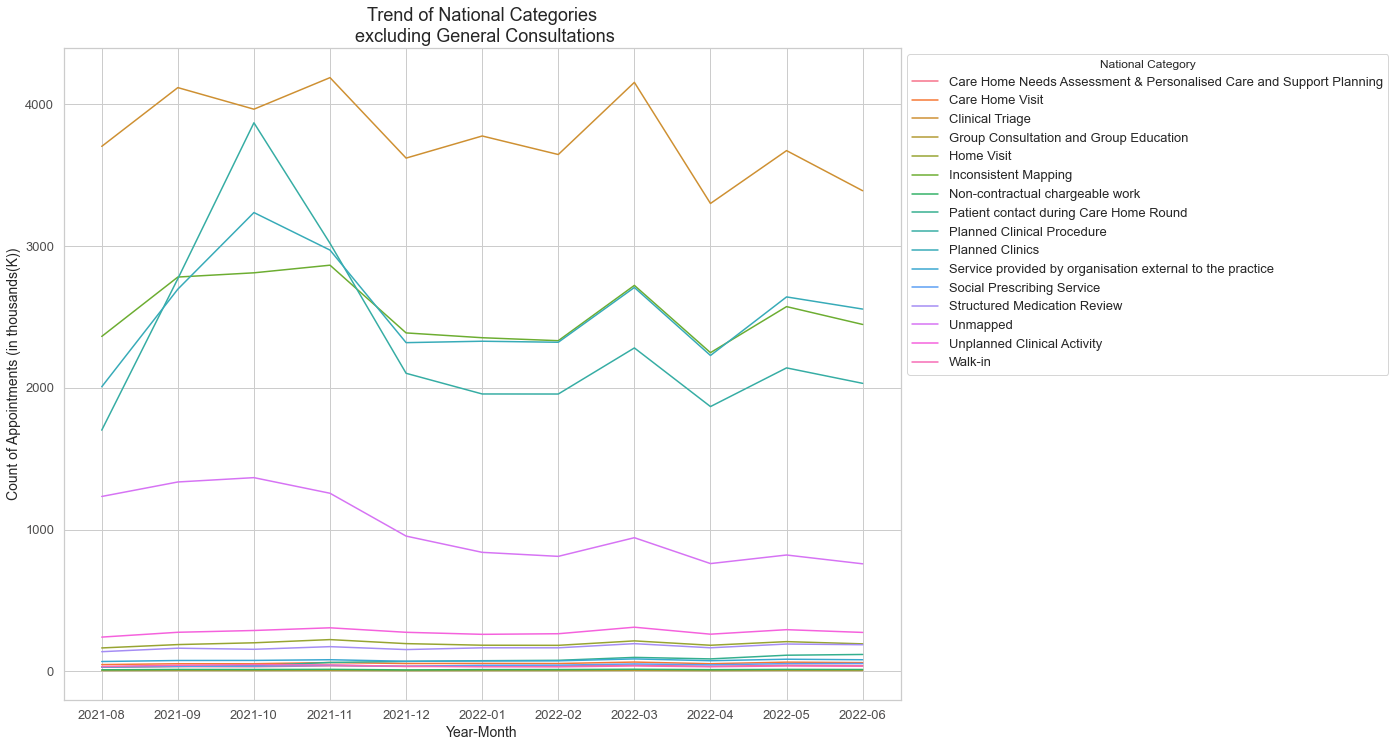

In [49]:
nc_cat_others = nc_natcat[~nc_natcat.national_category.str.contains('General')]
sns.set_palette("bright")
sns.lineplot(data = nc_cat_others,x=nc_cat_others.appointment_month,y=(nc_cat_others['count_of_appointments']/1000),
                       hue=nc_cat_others.national_category,ci=False)
plt.legend(title = 'National Category',bbox_to_anchor=(1,1))
plt.title("Trend of National Categories\n excluding General Consultations")
plt.xlabel("Year-Month")
plt.ylabel("Count of Appointments (in thousands(K))")


#nc_ss_others = nc_ss_others[nc_ss.service_setting!='Unmapped']
#nc_ss_others = nc_ss_others[nc_ss.service_setting!='Unmapped']

Text(0.5, 1.0, 'The distribution of national categories')

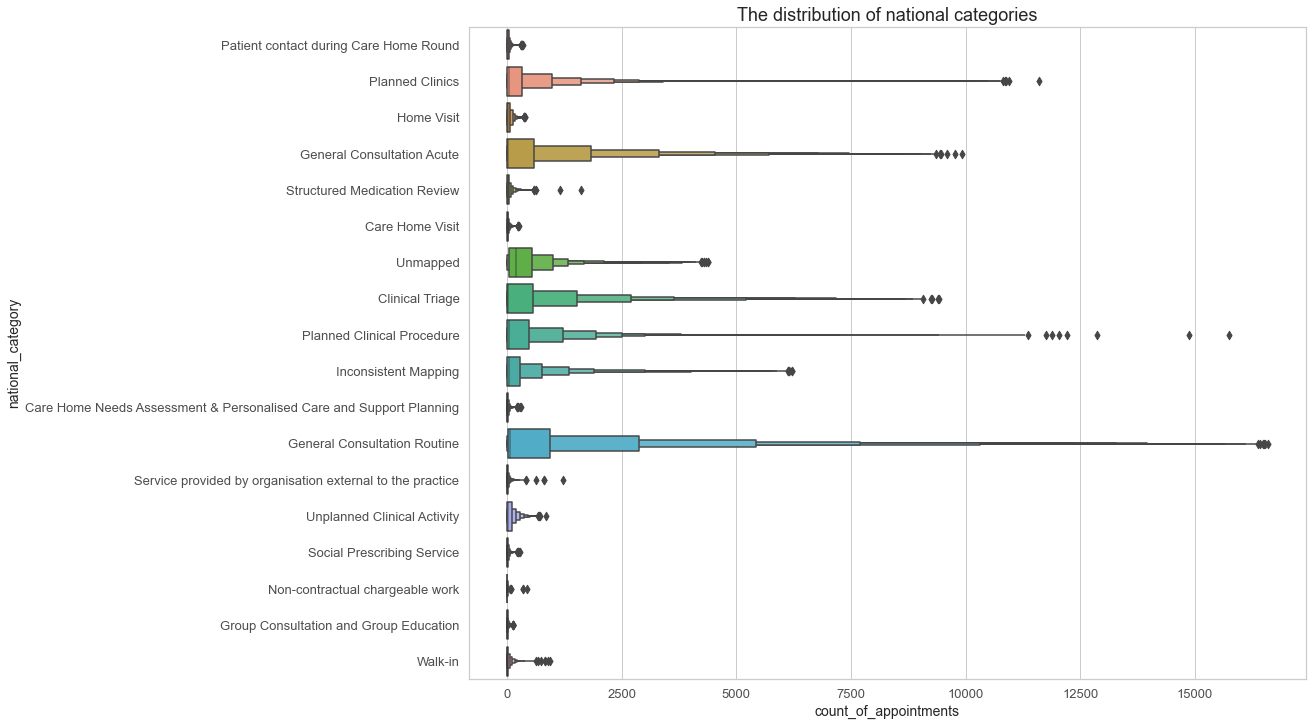

In [50]:
sns.boxenplot(y="national_category", x="count_of_appointments", data=nc)
plt.title("The distribution of national categories",fontsize=18)

We can see some outliers in Planned Clinical Procedure and Planned Clinics apart from the high values of General Consultations. Correspondingly we see a sharp inclline in October 2021 in the monthly trend graph above.

<AxesSubplot:xlabel='national_category', ylabel='appointment_month'>

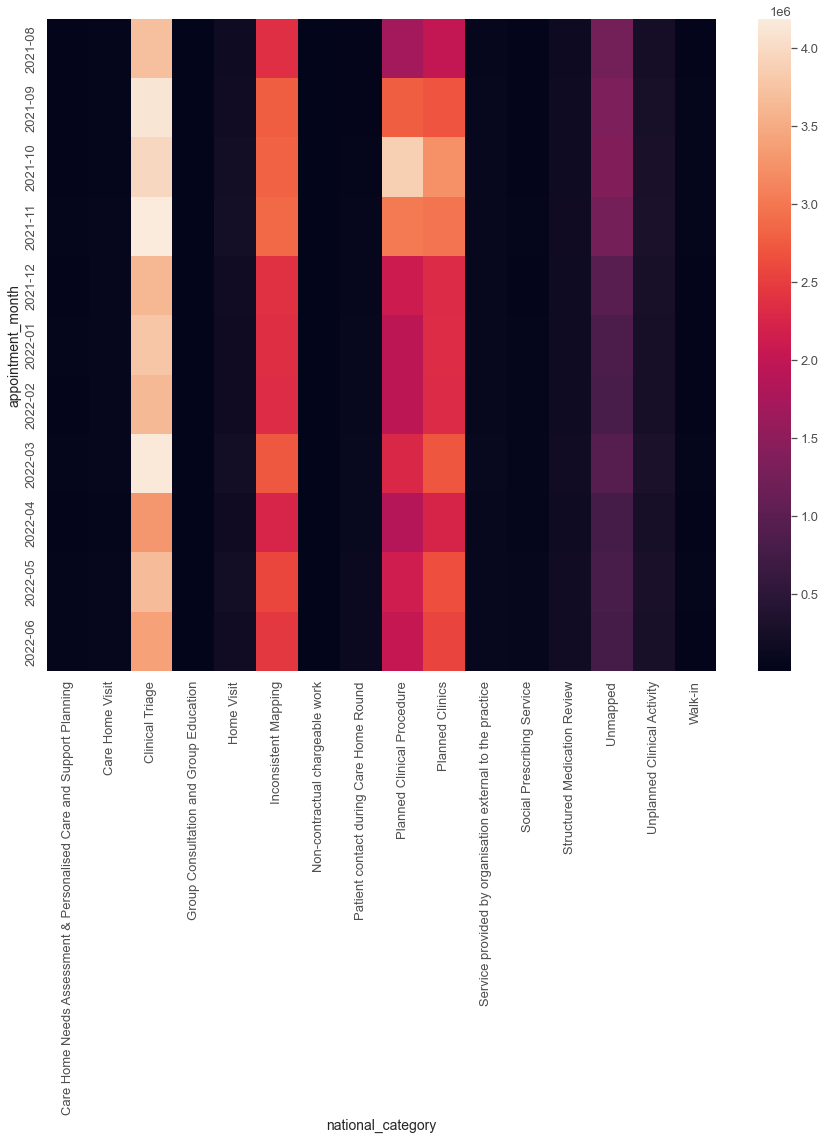

In [51]:
sns.heatmap(nc_cat_others.pivot(index='appointment_month',columns='national_category',values='count_of_appointments'))

The heatmap doesn't provide as much clarity as is desired,however, we can see certain categories clearly have higher values for count of appointments.

In [52]:
# A look at the preferred appointment modes in the year 2020,2021,2022

In [53]:
#ar.info()
ar_appmode = ar.copy()
ar_appmode.appointment_month = pd.to_datetime(ar_appmode.appointment_month)
ar_appmode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   icb_ons_code                       596821 non-null  object        
 1   appointment_month                  596821 non-null  datetime64[ns]
 2   appointment_status                 596821 non-null  object        
 3   hcp_type                           596821 non-null  object        
 4   appointment_mode                   596821 non-null  object        
 5   time_between_book_and_appointment  596821 non-null  object        
 6   count_of_appointments              596821 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 31.9+ MB


In [54]:
ar_appmode = ar_appmode.groupby(['appointment_mode','appointment_month']).agg({'count_of_appointments':'sum'}).reset_index()
ar_appmode = pd.DataFrame(ar_appmode)
ar_appmode

,appointment_mode,appointment_month,count_of_appointments
0,Face-to-Face,2020-01-01,21733394
1,Face-to-Face,2020-02-01,19230573
2,Face-to-Face,2020-03-01,15921794
3,Face-to-Face,2020-04-01,7480941
4,Face-to-Face,2020-05-01,7729597
...,...,...,...
145,Video/Online,2022-02-01,127697
146,Video/Online,2022-03-01,152018
147,Video/Online,2022-04-01,126453
148,Video/Online,2022-05-01,144188


In [55]:
#ar_appmode.appointment_month.dt.year
ar_appmode_2020 = ar_appmode[ar_appmode.appointment_month.dt.year == 2020]

In [56]:
ar_appmode_2020

,appointment_mode,appointment_month,count_of_appointments
0,Face-to-Face,2020-01-01,21733394
1,Face-to-Face,2020-02-01,19230573
2,Face-to-Face,2020-03-01,15921794
3,Face-to-Face,2020-04-01,7480941
4,Face-to-Face,2020-05-01,7729597
5,Face-to-Face,2020-06-01,9763381
6,Face-to-Face,2020-07-01,11184673
7,Face-to-Face,2020-08-01,10388825
8,Face-to-Face,2020-09-01,15092880
9,Face-to-Face,2020-10-01,16870816


Text(0, 0.5, 'Count of Appointments (in thousands(K))')

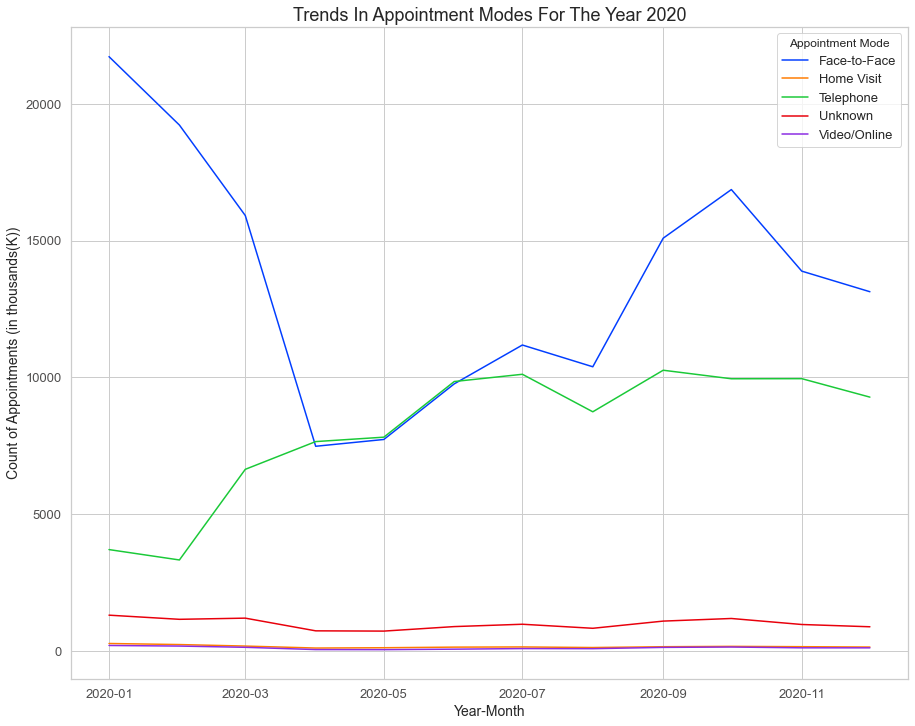

In [57]:
sns.lineplot(data=ar_appmode_2020,x=ar_appmode_2020['appointment_month'],y=(ar_appmode_2020['count_of_appointments']/1000),
            hue=ar_appmode_2020['appointment_mode'])
plt.legend(title = 'Appointment Mode',bbox_to_anchor=(1,1))
plt.title("Trends In Appointment Modes For The Year 2020")
plt.xlabel("Year-Month")
plt.ylabel("Count of Appointments (in thousands(K))")

In [58]:
ar_appmode_2021 = ar_appmode[ar_appmode.appointment_month.dt.year == 2021]

Text(0, 0.5, 'Count of Appointments (in thousands(K))')

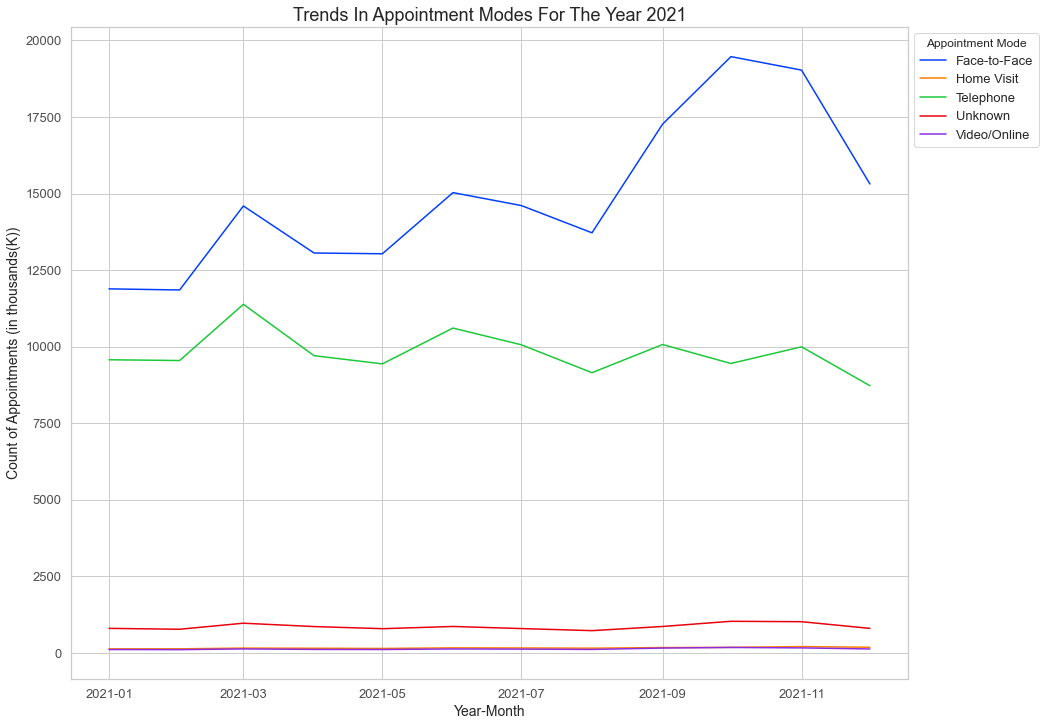

In [59]:
sns.lineplot(data=ar_appmode_2021,x=ar_appmode_2021['appointment_month'],y=(ar_appmode_2021['count_of_appointments']/1000),
            hue=ar_appmode_2021['appointment_mode'])
plt.legend(title = 'Appointment Mode',bbox_to_anchor=(1,1))
plt.title("Trends In Appointment Modes For The Year 2021")
plt.xlabel("Year-Month")
plt.ylabel("Count of Appointments (in thousands(K))")

In [60]:
ar_appmode_2022 = ar_appmode[ar_appmode.appointment_month.dt.year == 2022]

Text(0, 0.5, 'Count of Appointments (in thousands(K))')

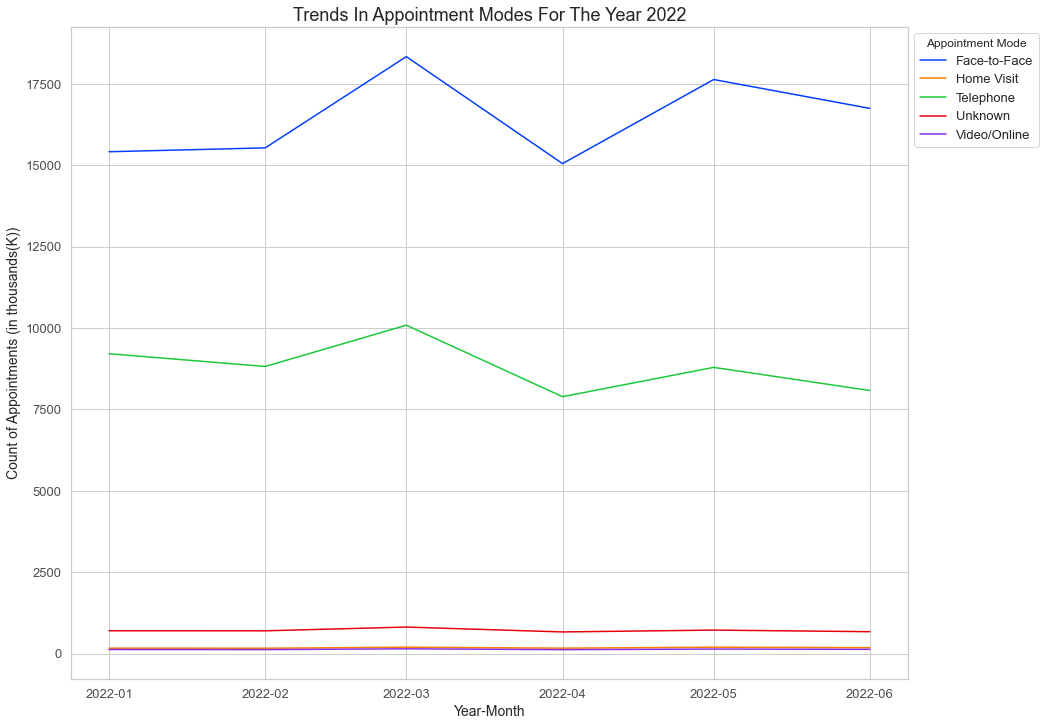

In [61]:
sns.lineplot(data=ar_appmode_2022,x=ar_appmode_2022['appointment_month'],y=(ar_appmode_2022['count_of_appointments']/1000),
            hue=ar_appmode_2022['appointment_mode'])
plt.legend(title = 'Appointment Mode',bbox_to_anchor=(1,1))
plt.title("Trends In Appointment Modes For The Year 2022")
plt.xlabel("Year-Month")
plt.ylabel("Count of Appointments (in thousands(K))")

Looking at the trends in appointment modes for the years 2020, 2021,2022 based on available data we can see the dip in face-to-face appointments for the Covid lockdown period and then revert to its usual trend later. 

# 

# Analysing the twitter data

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [62]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [63]:
# Load the data set.
tweets= pd.read_csv('../Data/tweets.csv')

# View the DataFrame.
tweets

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
...,...,...,...,...,...,...,...,...,...,...
1169,1567583004209332227,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…,"{'hashtags': [{'text': 'Innovation', 'indices': [29, 40]}, {'text': 'precisionFabrication', 'indices': [50, 71]}, {'text': 'Microfluidic', 'indices': [92, 105]}], 'symbols': [], 'user_mentions': [...","#Innovation, #precisionFabrication, #Microfluidic","{'iso_language_code': 'en', 'result_type': 'recent'}",1,0,False,False,en
1170,1567582945342267393,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie...","{'hashtags': [{'text': 'SKPoli', 'indices': [232, 239]}, {'text': 'healthcare', 'indices': [240, 251]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/33f7Dz5FrU', 'expanded_u...","#SKPoli, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,1,False,False,en
1171,1567582936014241792,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp...","{'hashtags': [{'text': 'webinar', 'indices': [149, 157]}, {'text': 'ESG', 'indices'

In [64]:
# Explore the metadata.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [65]:
# Explore the data set.
tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


We would like to look at retweeted and favourite tweet messages and hashtags and frequently occuring words in the text to get an over all sense of the topics trending  in these tweets. Examining the retweeted and favourite tweet messages is a good start to understanding the trending topics.  



In [66]:
# Top twenty retweeted tweets
tweets.sort_values('tweet_retweet_count',ascending = False).head(20)

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
263,1567649792897032192,RT @UltimaLionsDen: Temitope is looking to boost efficiency in the Health industry with his app- \nWe-Care Africa. \n\nWas his pitch in good s…,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'UltimaLionsDen', 'name': ""Ultima Lions' Den"", 'id': 973581329119039488, 'id_str': '973581329119039488', 'indices': [3, 18]}], 'ur...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",303,0,False,False,en
1139,1567585317498003456,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",208,0,False,False,en
985,1567594301978288130,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",208,0,False,False,en
330,1567644141726703617,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",208,0,False,False,en
595,1567621342987718656,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",208,0,False,False,en
1160,1567583655689854978,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",208,0,False,False,en
1168,1567583062354968576,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",208,0,False,False,en
1132,1567585759036669958,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...",NaN,"{'iso_language_code': 'en', 'result_type': 'recent'}",208,0,False,False,en
987,1567594286056603661,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'kh

In [67]:
# Top twenty favourited tweets
tweets.sort_values('tweet_favorite_count',ascending = False).head(20)

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
1156,1567583855422611461,Lipid-Lowering Drugs\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStudents #medstudenttwitter #lipid \n\nCredit: ...,"{'hashtags': [{'text': 'TipsForNewDocs', 'indices': [22, 37]}, {'text': 'MedEd', 'indices': [38, 44]}, {'text': 'MedTwitter', 'indices': [45, 56]}, {'text': 'medicine', 'indices': [57, 66]}, {'tex...","#TipsForNewDocs, #MedEd, #MedTwitter, #medicine, #medical, #medicare, #health, #healthcare, #FOAMed, #ClinicalPearl, #clinicaltips, #MedStudents, #medstudenttwitter, #lipid","{'iso_language_code': 'en', 'result_type': 'recent'}",12,42,False,False,en
9,1567582427719282689,You ready for $JCO @_JennyCo ❤️\n\n#Healthcare data powered by @Conste11ation $DAG 🔥,"{'hashtags': [{'text': 'Healthcare', 'indices': [33, 44]}], 'symbols': [{'text': 'JCO', 'indices': [14, 18]}, {'text': 'DAG', 'indices': [76, 80]}], 'user_mentions': [{'screen_name': '_JennyCo', '...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",1,28,False,False,en
442,1567634936341069826,How health insurance works 😂 \n\n#comedy #adulting #healthcare https://t.co/ciksdeoAkb,"{'hashtags': [{'text': 'comedy', 'indices': [31, 38]}, {'text': 'adulting', 'indices': [39, 48]}, {'text': 'healthcare', 'indices': [49, 60]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'med...","#comedy, #adulting, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",5,20,False,False,en
84,1567579049043832832,"Our nat’l choices re: #healthcare systems aren’t the continuum of public or private, but how much we want of:\n\n- fragmented or seamless\n- does simplicity or complexity well\n- prioritizes savin...","{'hashtags': [{'text': 'healthcare', 'indices': [22, 33]}, {'text': 'cdnpoli', 'indices': [270, 278]}], 'symbols': [], 'user_mentions': [], 'urls': []}","#healthcare, #cdnpoli","{'iso_language_code': 'en', 'result_type': 'recent'}",4,18,False,False,en
1122,1567586306607423488,"Heart Failure, Myocardial Infarction &amp; immediate Treatment\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStude...","{'hashtags': [{'text': 'TipsForNewDocs', 'indices': [64, 79]}, {'text': 'MedEd', 'indices': [80, 86]}, {'text': 'MedTwitter', 'indices': [87, 98]}, {'text': 'medicine', 'indices': [99, 108]}, {'te...","#TipsForNewDocs, #MedEd, #MedTwitter, #medicine, #medical, #medicare, #health, #healthcare, #FOAMed, #ClinicalPearl, #clinicaltips, #MedStudents, #medstudenttwitter, #lipid","{'iso_language_code': 'en', 'result_type': 'recent'}",3,17,False,False,en
119,1567577266162475011,"More data that our 13+ 🇨🇦 #healthcare systems fall short of providing adequate access to care, even for those w/ a family physician.\n\nInstead of siloed solutions and further system fragmentation...","{'hashtags': [{'text': 'healthcare', 'indices': [26, 37]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/eZkz5brcYT', 'expanded_url': 'https://www.ctvnews.ca/health/canadians...",#healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",4,14,False,False,en
758,1567611240024875008,Looking forward to speaking at #ConV2X on Sep 15! Ping me for a speaker discount if interested! Register at https://t.co/v20ebbXmdO \n\n.@BHTYjournal @hedera @acoerco\n#blockchain #DLT #healthcare...,"{'hashtags': [{'text': 'ConV2X', 'indices': [31, 38]}, {'text': 'blockchain', 'indices': [165, 176]}, {'text': 'DLT', 'indices': [177, 181]}, {'text': 'healthcare', 'indices': [182, 193]}, {'text'...","#ConV2X, #blockchain, #DLT, #healthcare, #innovation","{'iso_language_code': 'en', 'result_type': 'recent'}",3,13,False,False,en
1098,1567587492949286912,@CapricornFMNews We have waiting to hear this kind of news now Sa is getting things cor

In [68]:
# Create a new DataFrame containing only the text.
tweets_text = pd.DataFrame(tweets['tweet_full_text'])
# View the DataFrame.
tweets_text.head()

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."


In [69]:
tags = []
# Loop through the messages, and create a list of values containing the # symbol.
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

In [70]:
# Display the first 30 records.
tags[:30]

['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '🚨#new:🚨',
 'look!\n\n#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '🚨#new:🚨',
 '#disparities.',
 '@karahartnett\n#healthcare',
 '#alert',
 '#insurance',
 '#data\nhttps://t.co/h9hlamr7p9',
 '#healthcare']

In [71]:
# Convert the series to a DataFrame in preparation for visualisation.
tags = pd.DataFrame(tags)
# Rename the columns.
tags = tags.rename(columns= {0: 'word'})
tags['count'] = tags.word.map(tags.word.value_counts())
tags_unique = tags.drop_duplicates()
tags_unique.sort_values('count',ascending = False).head(20)

,word,count
0,#healthcare,716
261,#health,80
128,#medicine,41
503,#ai,40
41,#job,38
129,#medical,35
134,#strategy,30
146,#pharmaceutical,28
523,#digitalhealth,25
144,#pharma,25


In [72]:
# check the count datatype.
tags_unique.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1754 entries, 0 to 4327
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    1754 non-null   object
 1   count   1754 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 41.1+ KB


In [73]:
# Display records where the count is larger than 10.
tags_gt10 = tags_unique[tags_unique['count'] > 10]

tags_gt10

,word,count
0,#healthcare,716
2,#hiring,18
6,#digitaltransformation,11
41,#job,38
64,#telehealth,11
86,#hospitals,12
111,#telemedicine,13
117,#covid19,14
118,#usa,11
120,#coronavirus,16


Text(0.5, 1.0, 'Trending Hashtags related to Healthcare ')

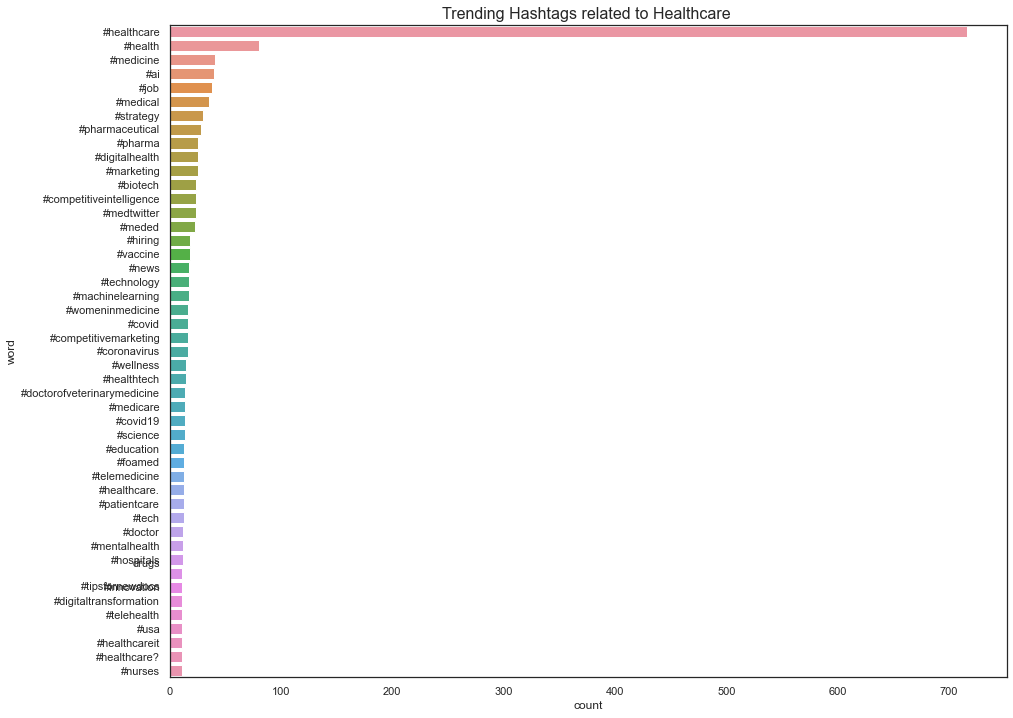

In [74]:
# Create a Seaborn barplot indicating records with a count >10 records.
sns.barplot(data = tags_gt10 ,y='word',x='count',order = tags_gt10.sort_values('count',ascending = False).word)
plt.title("Trending Hashtags related to Healthcare ",fontsize=16)


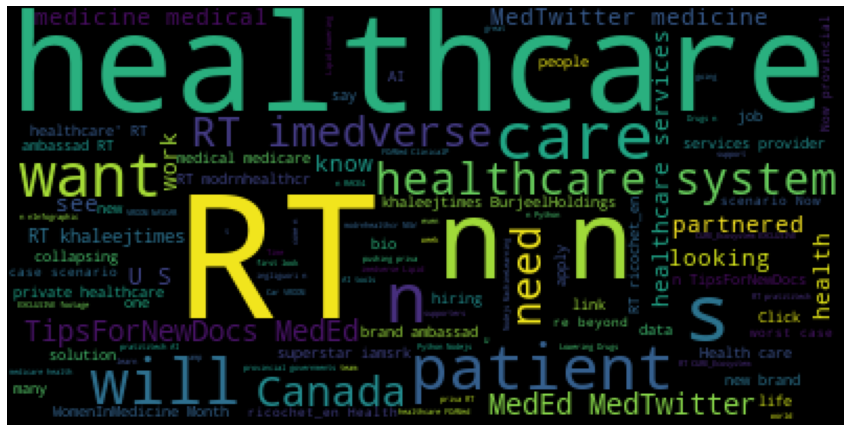

In [75]:
#!python -m pip install wordcloud
from wordcloud import WordCloud
cloud_string = tweets[~tweets['tweet_full_text'].str.contains('https')]
wordcloud = WordCloud().generate(str(cloud_string['tweet_full_text'].values))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 

# Analysing the dataset for key concerns

### Investigate the main concerns posed by the NHS. 

In [76]:

# # Colour palette to make charts look better.
blue, = sns.color_palette("muted", 1) 

# Dark grid, white grid, dark, white, and ticks.
sns.set_style('whitegrid') 

# Font size of the axes titles.
plt.rc('axes', titlesize=18) 

# Font size of the x and y labels.
plt.rc('axes', labelsize=14)    

# Font size of the tick labels.
plt.rc('xtick', labelsize=13,color='#4f4e4e') 

# Font size of the tick labels.
plt.rc('ytick', labelsize=13,color='#4f4e4e')  

# Font size of the Legend.
plt.rc('legend', fontsize=13)

# Default text size.
plt.rc('font', size=13) 

In [77]:
# Prepare your workstation.
# Load the appointments_regional.csv file.
ar_agg = pd.read_csv('../Data/appointments_regional.csv')

# View the DataFrame.
ar_agg

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [78]:
# Print the min and max dates.
ar_agg.appointment_month=pd.to_datetime(ar_agg.appointment_month)

print("The data is available between the dates {} and {}".format(ar_agg.appointment_month.min().strftime('%d-%b-%Y'),
                                                                 ar_agg.appointment_month.max().strftime('%d-%b-%Y')))

The data is available between the dates 01-Jan-2020 and 01-Jun-2022


In [79]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_agg = ar_agg[ar_agg['appointment_month']>'2021-07-31']

In [80]:
# Print the min and max dates.
ar_agg.appointment_month=pd.to_datetime(ar_agg.appointment_month)

print("The data is available between the dates {} and {}".format(ar_agg.appointment_month.min().strftime('%d-%b-%Y'),
                                                                 ar_agg.appointment_month.max().strftime('%d-%b-%Y')))

The data is available between the dates 01-Aug-2021 and 01-Jun-2022


In [81]:
ar_agg['appointment_month']=ar_agg['appointment_month'].astype('str')

**Question 1:** Should the NHS start looking at increasing staff levels? 

In [82]:
# Create an aggregated data set to review the different features.

ar_agg = ar_agg.groupby(['appointment_month','hcp_type', 'appointment_status', 
                  'appointment_mode','time_between_book_and_appointment']
                ).agg({'count_of_appointments':'sum'}).reset_index()
# View the DataFrame.
ar_agg

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08-01,GP,Attended,Face-to-Face,1 Day,507835
1,2021-08-01,GP,Attended,Face-to-Face,15 to 21 Days,194726
2,2021-08-01,GP,Attended,Face-to-Face,2 to 7 Days,959486
3,2021-08-01,GP,Attended,Face-to-Face,22 to 28 Days,102111
4,2021-08-01,GP,Attended,Face-to-Face,8 to 14 Days,398772
...,...,...,...,...,...,...
3749,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,5494
3750,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,5115
3751,2022-06-01,Unknown,Unknown,Unknown,Same Day,1914
3752,2022-06-01,Unknown,Unknown,Unknown,Unknown / Data Quality,53


In [83]:
# Determine the total number of appointments per month.

ar_df = ar_agg.groupby('appointment_month').agg({'count_of_appointments':'sum'}).reset_index()
ar_df
# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_df['utilisation']= (ar_df['count_of_appointments']/30).astype(int)




# View the DataFrame.
ar_df

,appointment_month,count_of_appointments,utilisation
0,2021-08-01,23852171,795072
1,2021-09-01,28522501,950750
2,2021-10-01,30303834,1010127
3,2021-11-01,30405070,1013502
4,2021-12-01,25140776,838025
5,2022-01-01,25635474,854515
6,2022-02-01,25355260,845175
7,2022-03-01,29595038,986501
8,2022-04-01,23913060,797102
9,2022-05-01,27495508,916516


Text(0, 0.5, 'Count of Appointments (in thousands(K))')

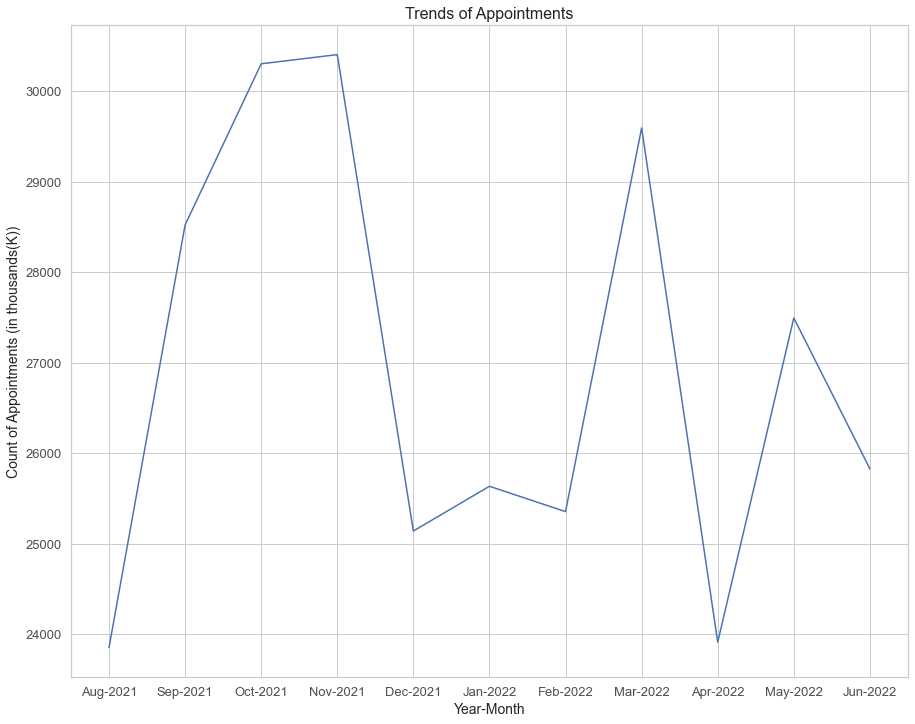

In [84]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.

ar_df.appointment_month = pd.to_datetime(ar_df.appointment_month)
ar_df.appointment_month=ar_df['appointment_month'].apply(lambda x: x.strftime('%b-%Y'))
daily_util_capacity = 1200000
ar_df['util_gap']= ((daily_util_capacity-ar_df['utilisation'])*100)/ar_df['utilisation']
sns.lineplot(data=ar_df,x=ar_df.appointment_month,y=(ar_df.count_of_appointments/1000))
plt.title("Trends of Appointments",fontsize=16)
plt.xlabel("Year-Month")
plt.ylabel("Count of Appointments (in thousands(K))")

In [85]:
ar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   appointment_month      11 non-null     object 
 1   count_of_appointments  11 non-null     int64  
 2   utilisation            11 non-null     int64  
 3   util_gap               11 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 480.0+ bytes


Text(0.2, 0.95, 'The NHS can accommodate a maximum of 1,200,000 appointments per day.(source:data provided)')

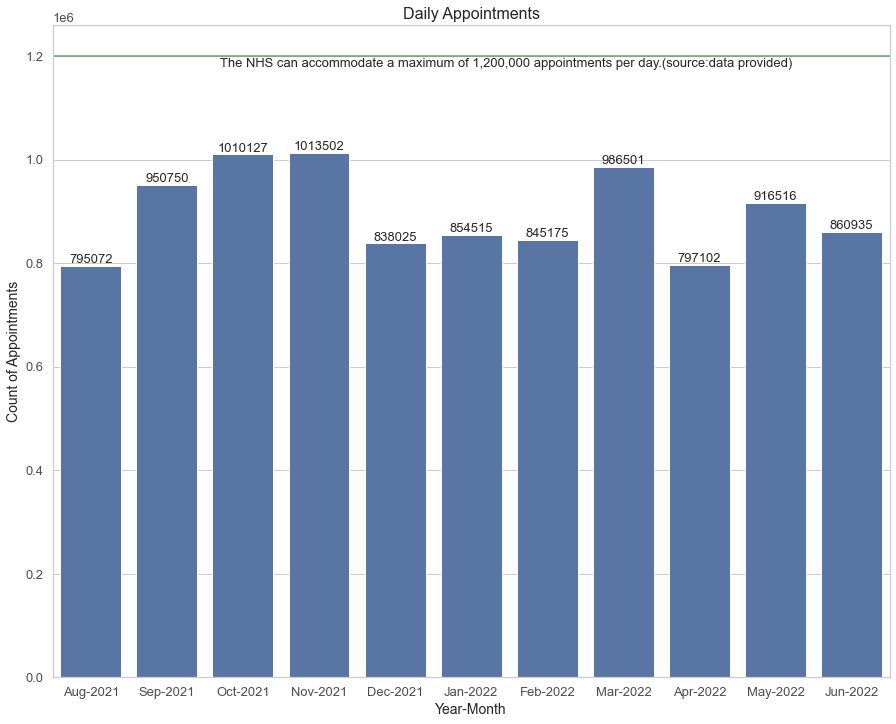

In [86]:
# Plot monthly capacity utilisation.
# Create a lineplot.

ax = sns.barplot(data=ar_df,x=ar_df.appointment_month,y=ar_df.utilisation,color='b')
ax.axhline(daily_util_capacity,color='g')
# customize the label to include the percent
labels = ar_df.utilisation.tolist()
# set the bar label
ax.bar_label(ax.containers[0], labels=labels, label_type='edge', size=13)
plt.title("Daily Appointments",fontsize=16)
plt.xlabel("Year-Month")
plt.ylabel("Count of Appointments")
plt.text(0.2,0.95,"The NHS can accommodate a maximum of 1,200,000 appointments per day.(source:data provided)",
         verticalalignment='top',transform=ax.transAxes)

**Question 2:** How do the healthcare professional types differ over time?

In [87]:
# Create a line plot to answer the question.
ar_hcp = ar_agg.groupby(['appointment_month','hcp_type']).agg({'count_of_appointments':'sum'}).reset_index()
ar_hcp.appointment_month = pd.to_datetime(ar_hcp.appointment_month)
ar_hcp.appointment_month=ar_hcp['appointment_month'].apply(lambda x: x.strftime('%b-%Y'))
ar_hcp


,appointment_month,hcp_type,count_of_appointments
0,Aug-2021,GP,12299022
1,Aug-2021,Other Practice staff,10797821
2,Aug-2021,Unknown,755328
3,Sep-2021,GP,14487785
4,Sep-2021,Other Practice staff,13126731
5,Sep-2021,Unknown,907985
6,Oct-2021,GP,14300751
7,Oct-2021,Other Practice staff,14942504
8,Oct-2021,Unknown,1060579
9,Nov-2021,GP,14897749


Text(0.5, 0.5, "The occupations grouped as HCP type 'Other Practice Staff' are\n:* Acupuncturist\n* Chiropodist\n* Community Psychiatric Nurse\n* Counsellor\n* Dispenser\n* District Nurse\n* Health Visitor\n* Interpreter/Link Worker\n* Osteopath\n* Other Practice Staff\n* Physiotherapist\n* Practice Nurse\n")

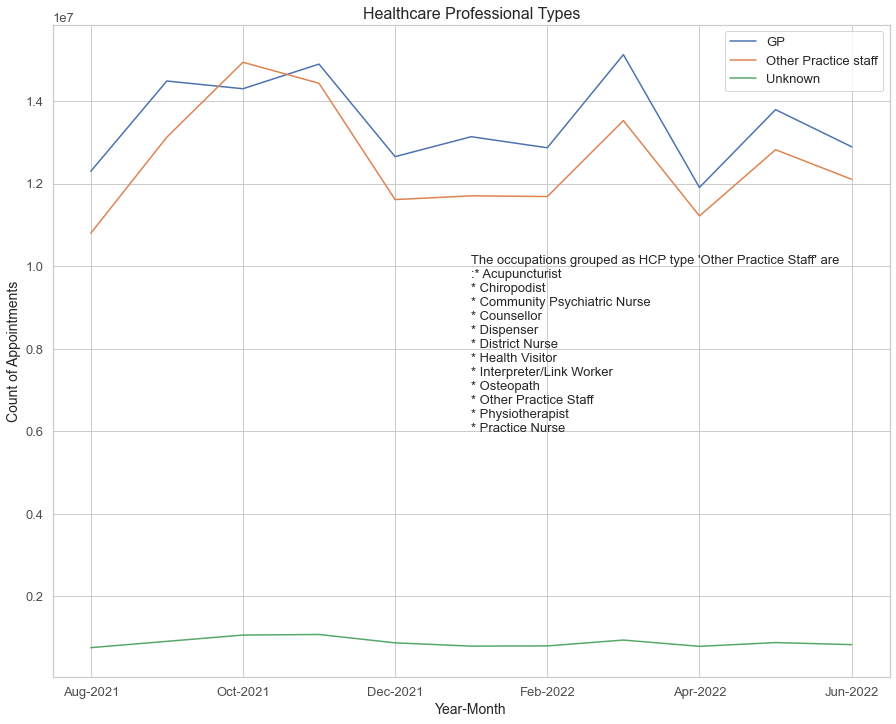

In [88]:
fig, ax = plt.subplots()
for key, data in ar_hcp.groupby('hcp_type'):
    data.plot(x='appointment_month', y='count_of_appointments', ax=ax, label=key)

plt.title("Healthcare Professional Types",fontsize=16)
plt.xlabel("Year-Month")
plt.ylabel("Count of Appointments")
plt.text(0.5,0.5,"The occupations grouped as HCP type 'Other Practice Staff' are\n:"+
"* Acupuncturist\n"+
"* Chiropodist\n"+ 
"* Community Psychiatric Nurse\n"+
"* Counsellor\n"+
"* Dispenser\n"+
"* District Nurse\n"+
"* Health Visitor\n"+
"* Interpreter/Link Worker\n"+
"* Osteopath\n"+
"* Other Practice Staff\n"+
"* Physiotherapist\n"+
"* Practice Nurse\n",verticalalignment='center',transform=ax.transAxes)

**Question 3:** Are there significant changes in whether or not visits are attended?

In [89]:
# Create a line plot to answer the question.

ar_visit = ar_agg.groupby(['appointment_month','appointment_status']
                         ).agg({'count_of_appointments':'sum'}).reset_index()

ar_visit.appointment_month = pd.to_datetime(ar_visit.appointment_month)
ar_visit.appointment_month=ar_visit['appointment_month'].apply(lambda x: x.strftime('%b-%Y'))
ar_visit


,appointment_month,appointment_status,count_of_appointments
0,Aug-2021,Attended,22081765
1,Aug-2021,DNA,949137
2,Aug-2021,Unknown,821269
3,Sep-2021,Attended,25757066
4,Sep-2021,DNA,1321348
5,Sep-2021,Unknown,1444087
6,Oct-2021,Attended,27170506
7,Oct-2021,DNA,1565624
8,Oct-2021,Unknown,1567704
9,Nov-2021,Attended,27667665


Text(0, 0.5, 'Count of Appointments')

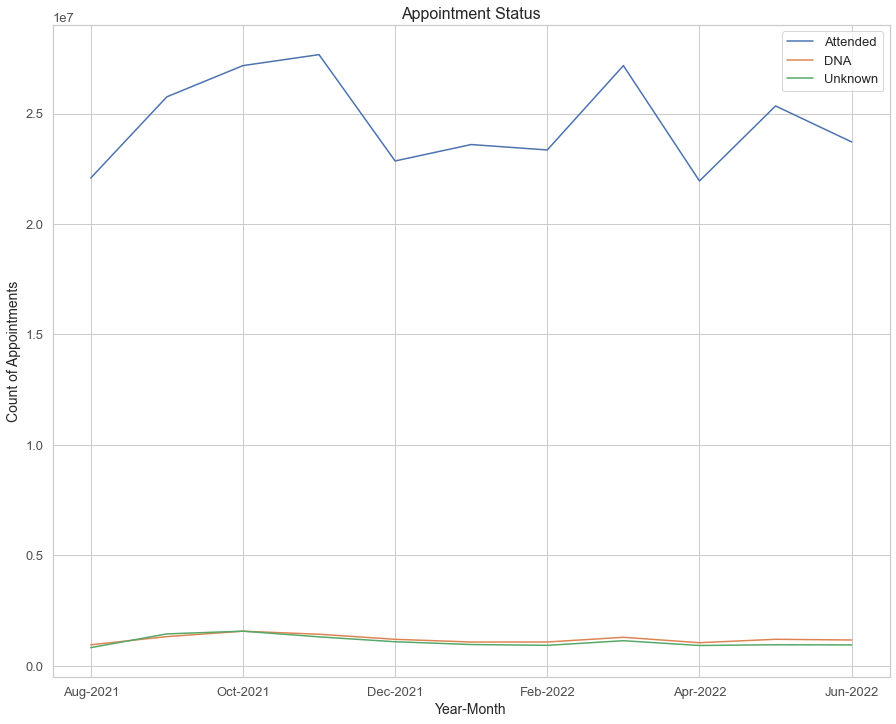

In [90]:
# Create a line plot to answer the question.
fig, ax = plt.subplots()
for key, data in ar_visit.groupby('appointment_status'):
    data.plot(x='appointment_month', y='count_of_appointments', ax=ax, label=key)

plt.title("Appointment Status",fontsize=16)
plt.xlabel("Year-Month")
plt.ylabel("Count of Appointments")

**Question 4:** Are there changes in terms of appointment type and the busiest months?

In [91]:
# Create a line plot to answer the question.
ar_at = ar_agg.groupby(['appointment_month','appointment_mode']).agg({'count_of_appointments':'sum'}).reset_index()
ar_at.appointment_month = pd.to_datetime(ar_at.appointment_month)
ar_at.appointment_month=ar_at['appointment_month'].apply(lambda x: x.strftime('%b-%Y'))
ar_at


,appointment_month,appointment_mode,count_of_appointments
0,Aug-2021,Face-to-Face,13717325
1,Aug-2021,Home Visit,151619
2,Aug-2021,Telephone,9149072
3,Aug-2021,Unknown,724126
4,Aug-2021,Video/Online,110029
5,Sep-2021,Face-to-Face,17266602
6,Sep-2021,Home Visit,171829
7,Sep-2021,Telephone,10068770
8,Sep-2021,Unknown,859946
9,Sep-2021,Video/Online,155354


Text(0, 0.5, 'Count of Appointments')

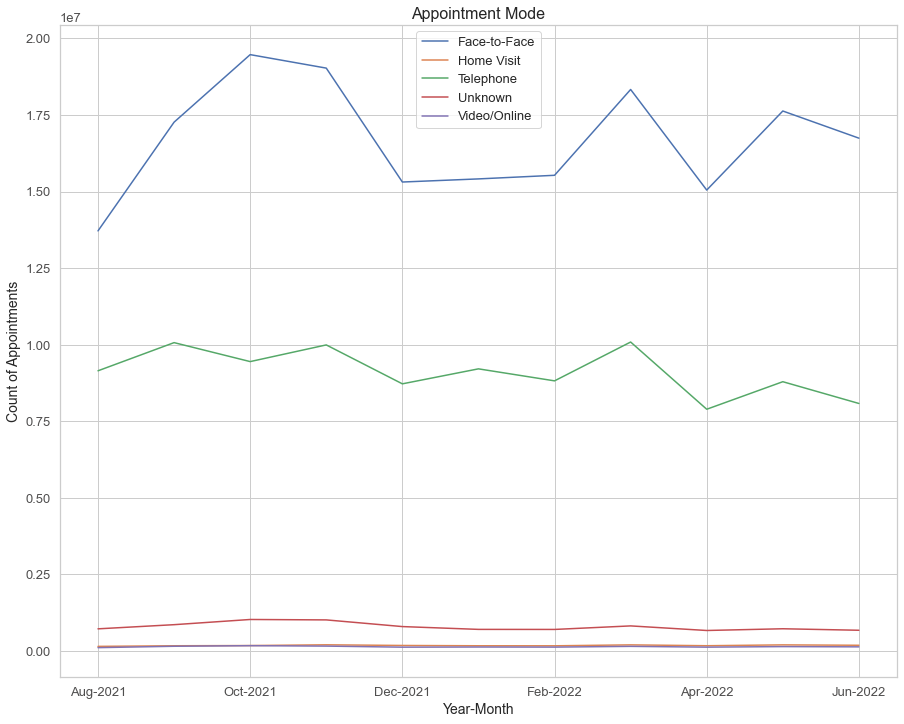

In [92]:
fig, ax = plt.subplots()
for key, data in ar_at.groupby('appointment_mode'):
    data.plot(x='appointment_month', y='count_of_appointments', ax=ax, label=key)
plt.title("Appointment Mode",fontsize=16)
plt.xlabel("Year-Month")
plt.ylabel("Count of Appointments")

**Question 5:** Are there any trends in time between booking an appointment?

Text(0, 0.5, 'Count of Appointments')

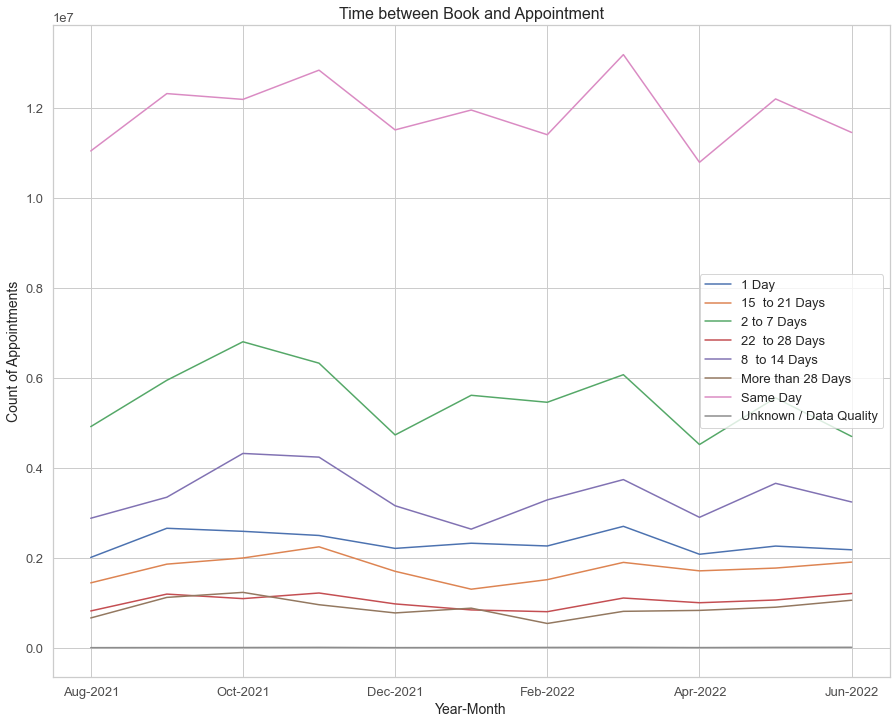

In [93]:
# Create a line plot to answer the question.
ar_tbb = ar_agg.groupby(['appointment_month','time_between_book_and_appointment']
                       ).agg({'count_of_appointments':'sum'}).reset_index()

ar_tbb.appointment_month = pd.to_datetime(ar_tbb.appointment_month)
ar_tbb.appointment_month=ar_tbb['appointment_month'].apply(lambda x: x.strftime('%b-%Y'))

fig, ax = plt.subplots()
for key, data in ar_tbb.groupby('time_between_book_and_appointment'):
    data.plot(x='appointment_month', y='count_of_appointments', ax=ax, label=key)
    
plt.title("Time between Book and Appointment",fontsize=16)
plt.xlabel("Year-Month")
plt.ylabel("Count of Appointments")    


In [94]:
#!pip3 install sktime
#!pip3 install pmdarima

In [95]:
from sktime.forecasting.model_selection import temporal_train_test_split

In [96]:
y = pd.DataFrame({'count_of_appointments':ar['count_of_appointments'],'appointment_month':ar['appointment_month']})
y = y.groupby(['appointment_month']).agg({'count_of_appointments':'sum'}).reset_index()
y.index = pd.to_datetime(y['appointment_month'],format='%Y-%m')
y = y.drop('appointment_month', axis=1)


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

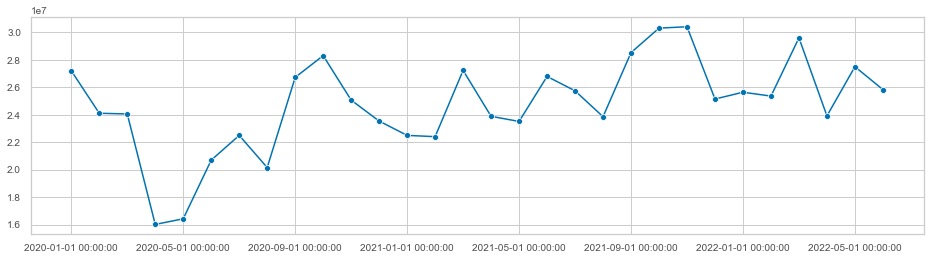

In [97]:
# Font size of the x and y labels.
plt.rc('axes', labelsize=12)    

# Font size of the tick labels.
plt.rc('xtick', labelsize=10,color='#4f4e4e') 

# Font size of the tick labels.
plt.rc('ytick', labelsize=10,color='#4f4e4e')  

from sktime.utils.plotting import plot_series
plot_series(y)

In [98]:
#y = y[y.index > '2020-11-01']

In [99]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.trend import TrendForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.ets import AutoETS
y_train, y_test = temporal_train_test_split(y)
y_train = y_train.resample('M').mean()
y_test  = y_test.resample('M').mean()
fh = ForecastingHorizon(y_test.index, is_relative=False)
#forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)
forecaster = NaiveForecaster(strategy="mean",sp=12)
#forecaster = AutoARIMA(sp=12, suppress_warnings=True)
#forecaster = TrendForecaster()
#forecaster = PolynomialTrendForecaster() 
#forecaster = ExponentialSmoothing()
#forecaster = ThetaForecaster()
forecaster.fit(y_train)
# y_pred will contain the predictions
y_pred = forecaster.predict(fh)
fh = np.arange(1,10)
y_fut_pred = forecaster.predict(fh)
y_int = forecaster.predict_interval(fh)

In [100]:
y_int

Coverage              
                     0.9              
                   lower         upper
2021-11-30  1.757342e+07  3.254979e+07
2021-12-31  1.604775e+07  3.102412e+07
2022-01-31  1.735750e+07  3.233387e+07
2022-02-28  1.576391e+07  3.074028e+07
2022-03-31  1.815126e+07  3.312763e+07
2022-04-30  1.245572e+07  2.743209e+07
2022-05-31  1.247462e+07  2.745099e+07
2022-06-30  1.624931e+07  3.122568e+07
2022-07-31  1.662714e+07  3.160351e+07

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

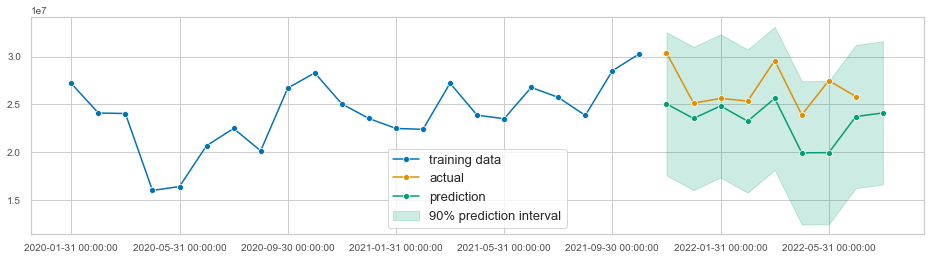

In [101]:
#upper = y_int.iloc[:,1]
#lower = y_int.iloc[:,0]
#plot_series(y_train, y_test,y_fut_pred,upper,lower,labels=["y_train", "y_test","y_fut_pred","upper","lower"])
plot_series(y_train, y_test,y_fut_pred,labels=["training data", "actual","prediction"],pred_interval=y_int)
#plt.text(0.2,0.2,"upper and lower predictiction intervals with 90% coverage",
#plt.text(0.2,0.2,"upper and lower predictiction intervals with 90% coverage",verticalalignment='top',transform=ax.transAxes)


In [102]:
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
mape = MeanAbsolutePercentageError(symmetric=False)
mape(y_test, y_pred)

0.12598459523202749

In [103]:
y_fut_pred.count_of_appointments=y_fut_pred.count_of_appointments.astype(int)
y_fut_pred

,count_of_appointments
2021-11-30,25061602
2021-12-31,23535936
2022-01-31,24845682
2022-02-28,23252095
2022-03-31,25639446
2022-04-30,19943906
2022-05-31,19962803
2022-06-30,23737493
2022-07-31,24115328


# 

### Summary 
The Naive Forecaster was chosen here because it provided the best results.The naive forecaster assumes the past trends will continue and forecasts on that basis. [Naive Forecaster](https://www.sktime.org/en/stable/api_reference/auto_generated/sktime.forecasting.naive.NaiveForecaster.html)
The Mape value and the predicted intervals show that the forecast is acceptable but could be more accurate as more data is accumulated and less affected by the steep decline corresponding to the 2020 lockdown period.